In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
# Insert at 1, 0 is the script path
sys.path.insert(1, './python-scripts/development')
from preprocessing_variables import data_scaler_type
from clustering_functions import plot_features_for_group
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
import json

In [3]:
data = pd.read_csv('../data/cleaned_data_' + data_scaler_type + '.csv', index_col="country")
data.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,opposite_of_crime_index,adjusted_net_national_income,current_account_balance,...,population_growth,fixed_broadband_subscriptions,secure_internet_servers,consumer_price_index,"inflation,_consumer_prices",access_to_electricity,forest_area,land_area,population_density,urban_population
country,,,,,,,,,,,,,,,,,,,,,
Finland,1.000000,0.856496,0.953030,0.822718,0.994595,0.232906,0.909710,0.784169,0.012505,0.507407,...,0.334909,0.534286,0.110178,0.999226,0.992358,1.0,0.756920,0.018558,0.000915,0.85517
Denmark,0.965848,0.884110,0.941667,0.824841,0.971622,0.401709,0.906303,0.803295,0.017378,0.609279,...,0.362043,0.717153,0.373890,0.999337,0.992969,1.0,0.161284,0.002442,0.007380,0.88116
Iceland,0.951265,0.876415,1.000000,0.852442,0.970270,0.576923,0.325383,0.837777,0.000978,0.508507,...,0.606145,0.666454,0.101897,0.998072,0.988336,1.0,0.005228,0.006157,0.000177,0.93898
Switzerland,0.942957,0.917157,0.928788,0.872611,0.914865,0.314103,0.785349,0.867514,0.031193,0.533379,...,0.439125,0.746407,0.161959,1.000000,0.995242,1.0,0.329695,0.002413,0.011067,0.73915
Netherlands,0.925051,0.880489,0.913636,0.835456,0.879730,0.579060,0.713799,0.790172,0.041755,0.592995,...,0.410425,0.704263,0.184681,0.998961,0.991498,1.0,0.112657,0.002056,0.026239,0.92236


## 1. Initial EDA

I want to check initial data distribution using graphs and see if any of the features are highly correlated. This will give me an intuition of my data distribution. This can also tell me if PCA could be used for better results (if features are highly dependent).

For the min_max scaled data I will have no outliers, but for the standard scaled data I can check the outlier values.

In [4]:
data.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,opposite_of_crime_index,adjusted_net_national_income,current_account_balance,...,population_growth,fixed_broadband_subscriptions,secure_internet_servers,consumer_price_index,"inflation,_consumer_prices",access_to_electricity,forest_area,land_area,population_density,urban_population
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.615986,0.689742,0.728419,0.672220,0.732629,0.309318,0.276897,0.552137,0.031525,0.486021,...,0.476882,0.318334,0.026820,0.995784,0.976705,0.933098,0.308162,0.057522,0.015055,0.656787
std,0.200197,0.156149,0.190648,0.154870,0.185542,0.178704,0.234857,0.196797,0.110509,0.085180,...,0.179843,0.232735,0.053044,0.012343,0.095099,0.157319,0.203686,0.140466,0.051045,0.210083
min,0.000000,0.343142,0.000000,0.286624,0.000000,0.000000,0.000000,0.041463,0.000223,0.133214,...,0.000000,0.000508,0.000008,0.870794,0.000000,0.352082,0.000464,0.000019,0.000100,0.133450
25%,0.501754,0.584880,0.629545,0.599788,0.639189,0.185897,0.109029,0.418679,0.001653,0.448248,...,0.342672,0.101515,0.000309,0.996434,0.986079,0.987602,0.120652,0.003777,0.002254,0.541940
50%,0.643714,0.696243,0.779545,0.682590,0.763514,0.267094,0.195911,0.546978,0.005598,0.489200,...,0.489970,0.285829,0.002533,0.998313,0.990053,1.000000,0.319572,0.013894,0.004687,0.684140
75%,0.750046,0.821639,0.881061,0.794055,0.879730,0.431624,0.357751,0.702778,0.019581,0.533763,...,0.598033,0.502633,0.030161,0.998961,0.992358,1.000000,0.448876,0.039865,0.010110,0.814250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.956722,1.000000,0.786203,...,0.971395,0.775119,0.373890,1.000000,1.000000,1.000000,0.812797,1.000000,0.406316,1.000000


I will plot some histograms to see data distribution of some of (what I consider) the more relevant features.

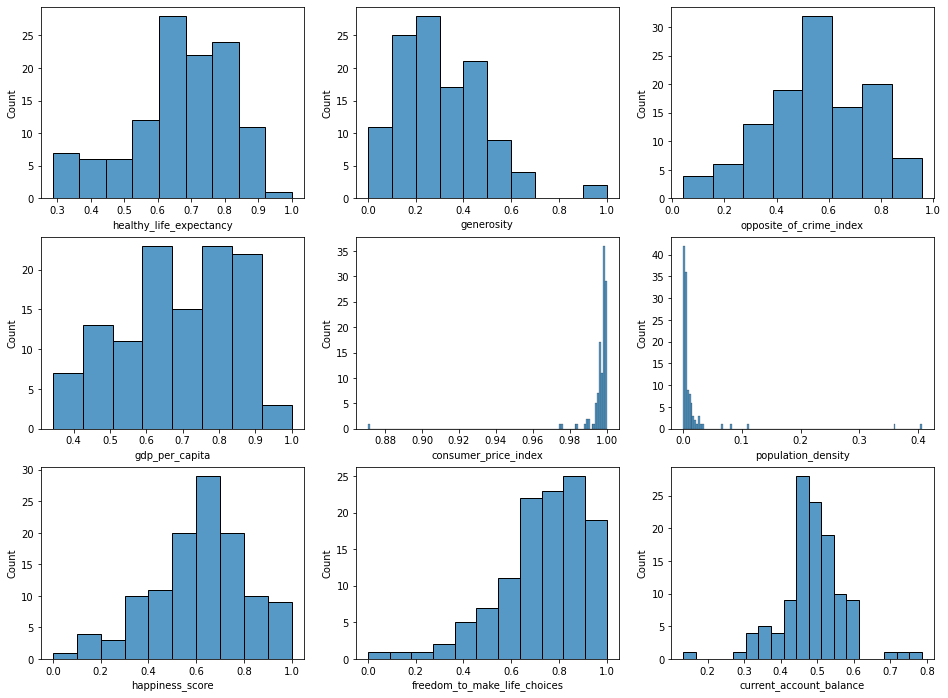

In [5]:
features_to_plot = ['healthy_life_expectancy', 'generosity', 'opposite_of_crime_index', 'gdp_per_capita', 
                   'consumer_price_index', 'population_density', 'happiness_score', 'freedom_to_make_life_choices', 
                    'current_account_balance']
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 12))

for i in range(len(features_to_plot)):
    sns.histplot(ax=axes[i//3, i%3], x=data[features_to_plot[i]])

<AxesSubplot:>

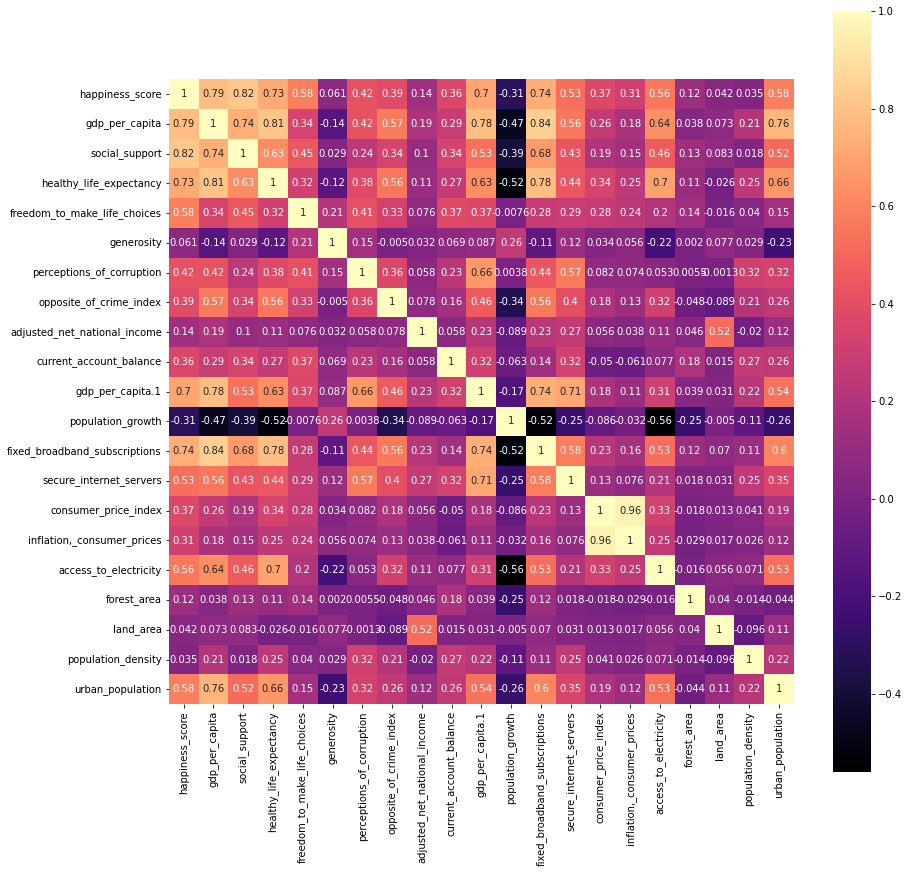

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='magma')

I can see that consumer_price_index is almost the same as inflation,consumer_prices. Because of this, I will remove one of them for being redundant.

I can also see that we have some gdp score from both world_happiness_report and from the financial_indicators report.
Because I am interested in the actual number and not those on the happiness report, I will drop the gdp_per_capita columns from the world happiness report. 

There is a group of features that seems highly correlated between themselves:
- happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, fixed_broadband_subscriptions
It's a potential to reduce redundancy by keeping only one of these features.

<AxesSubplot:>

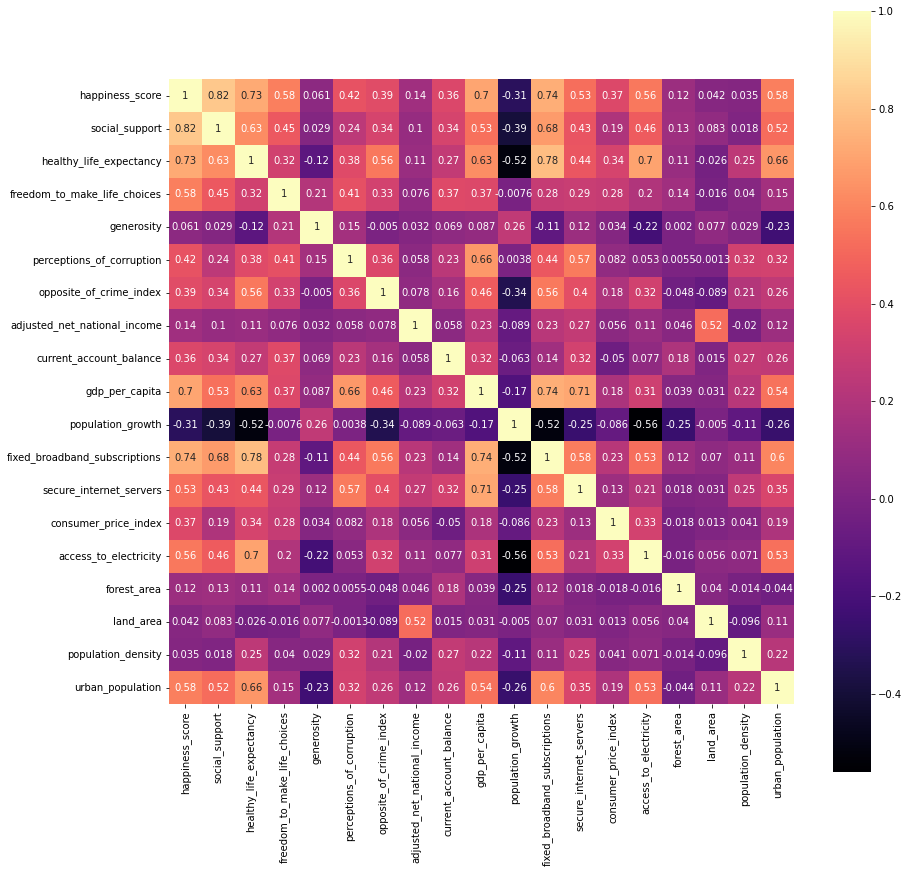

In [7]:
# Drop redundant columns
data = data.drop(columns=['inflation,_consumer_prices', 'gdp_per_capita'])

# Rename column 
data = data.rename(columns={'gdp_per_capita.1': 'gdp_per_capita'})

# Plot again
corr_matrix = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='magma')

### 1.1 Group evaluation

I will want to evaluate each group and draw some conclusions about each and every one. Therefore I will save a dataframe representing statistics about the columns. Statistics such as median, mean and quantiles. This way I can better see what kind of countries are in each group.

In [8]:
data_statistics = data.describe().drop(labels='count')
data_statistics

,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,opposite_of_crime_index,adjusted_net_national_income,current_account_balance,gdp_per_capita,population_growth,fixed_broadband_subscriptions,secure_internet_servers,consumer_price_index,access_to_electricity,forest_area,land_area,population_density,urban_population
mean,0.615986,0.728419,0.672220,0.732629,0.309318,0.276897,0.552137,0.031525,0.486021,0.100751,0.476882,0.318334,0.026820,0.995784,0.933098,0.308162,0.057522,0.015055,0.656787
std,0.200197,0.190648,0.154870,0.185542,0.178704,0.234857,0.196797,0.110509,0.085180,0.125201,0.179843,0.232735,0.053044,0.012343,0.157319,0.203686,0.140466,0.051045,0.210083
min,0.000000,0.000000,0.286624,0.000000,0.000000,0.000000,0.041463,0.000223,0.133214,0.001601,0.000000,0.000508,0.000008,0.870794,0.352082,0.000464,0.000019,0.000100,0.133450
25%,0.501754,0.629545,0.599788,0.639189,0.185897,0.109029,0.418679,0.001653,0.448248,0.019200,0.342672,0.101515,0.000309,0.996434,0.987602,0.120652,0.003777,0.002254,0.541940
50%,0.643714,0.779545,0.682590,0.763514,0.267094,0.195911,0.546978,0.005598,0.489200,0.040526,0.489970,0.285829,0.002533,0.998313,1.000000,0.319572,0.013894,0.004687,0.684140
75%,0.750046,0.881061,0.794055,0.879730,0.431624,0.357751,0.702778,0.019581,0.533763,0.141671,0.598033,0.502633,0.030161,0.998961,1.000000,0.448876,0.039865,0.010110,0.814250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.956722,1.000000,0.786203,0.669459,0.971395,0.775119,0.373890,1.000000,1.000000,0.812797,1.000000,0.406316,1.000000


## 2. K-Means clustering

This is the core of the project. I want to use K-means clustering to see if these 117 countries can be split into groups of similar qualities. I will find the right amount of clusters by using the elbow method and silhouette score.

After I find these clusters, if they are meaningful enough, I will do a short EDA on their members and then categorize each group with different scores (depending on what relationships I find).

I will do this for each type of clustering and decide which one is best. I am hoping to get more than 4 groups of countries, but less than 10. These are my expectations. I am really curious to see what these groups are.

<AxesSubplot:>

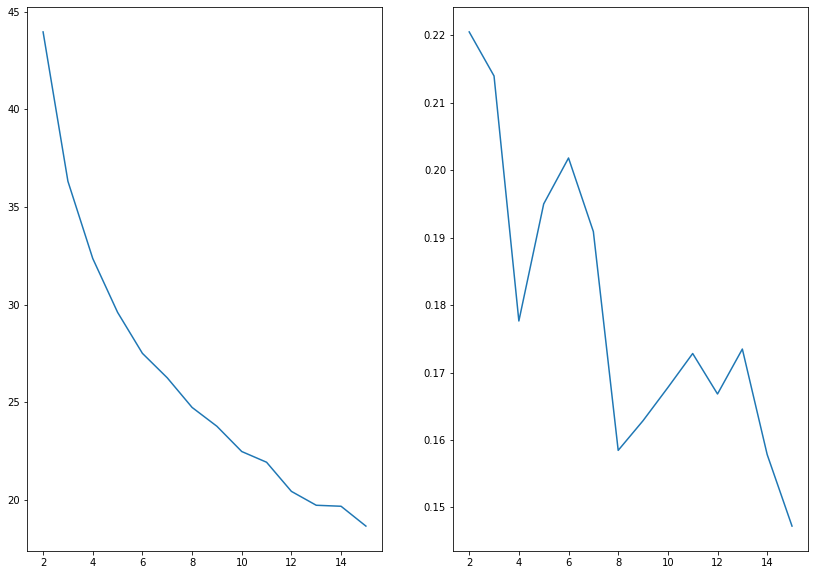

In [9]:
max_clusters_number = 16
inertia_list = []
silhouette_coefficients = []
for clusters in range(2, max_clusters_number):
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=20, max_iter=200, random_state=42)
    kmeans.fit(data)
    inertia_list.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(data, kmeans.labels_))

# Plot inertia for different number of clusters
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(2, max_clusters_number), y=inertia_list, legend=True, ax=axes[0])
sns.lineplot(x=range(2, max_clusters_number), y=silhouette_coefficients, legend=True, ax=axes[1])

This does not look so great. The inertia score is usually a value between -1 and 1, where 1 denotes perfect clustering (point are very close to other points in their clusters and very far from points in other clusters).

What I got here is an inertia value closer to 0. That means that my clusters are overlapping. I will try to see if any feature filtering method could help me establish more relevant clusters.

C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

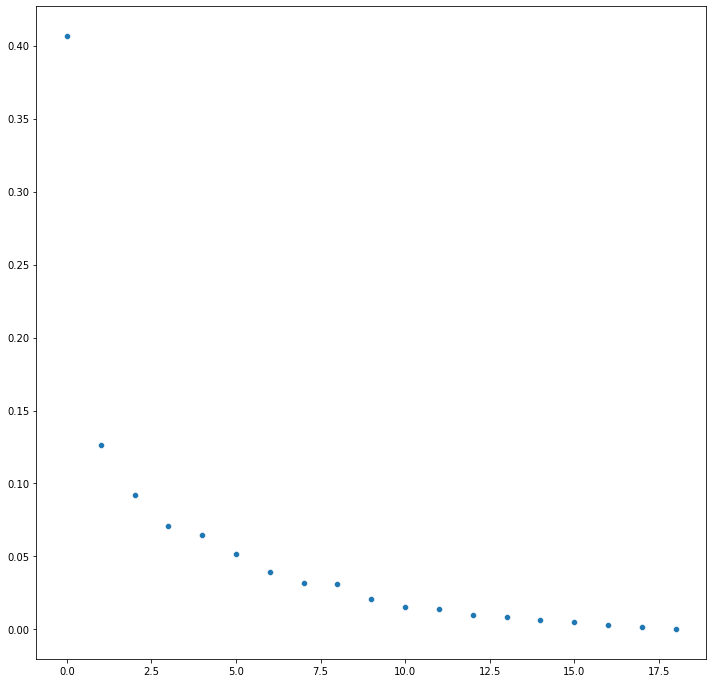

In [10]:
# 1. Use PCA to find a lower number of features to use for kmeans
pca = PCA(random_state=42)
data_pca = pd.DataFrame(pca.fit_transform(data), index=data.index)
plt.figure(figsize=(12, 12))
sns.scatterplot(range(0, pca.n_components_), pca.explained_variance_ratio_)

I can see that there is only one component that explains the dataset variance. However, so as to not only use one feature, I will keep the 3 most important features and see how this affects my kmeans scores.

In [11]:
kept_data_pca = data_pca.iloc[:, [0, 1, 2]]
kept_data_pca

,0,1,2
country,,,
Finland,-0.839631,0.293327,0.303204
Denmark,-0.914218,0.425152,-0.178105
Iceland,-0.683420,0.234902,-0.227625
Switzerland,-0.861783,0.336690,-0.052872
Netherlands,-0.782291,0.351537,-0.197113
...,...,...,...
Botswana,0.523895,-0.004353,-0.135146
Rwanda,0.672258,0.894403,-0.278242
Zimbabwe,0.888612,0.057910,0.126205


<AxesSubplot:>

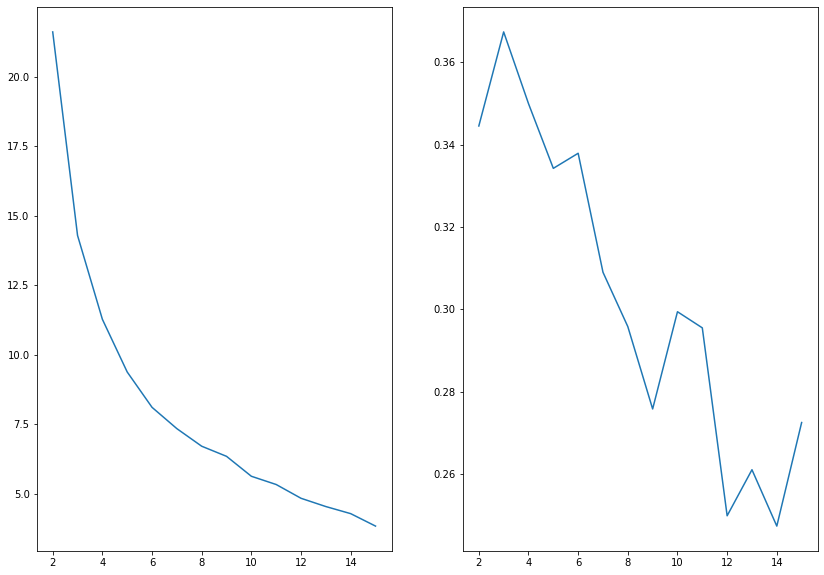

In [12]:
# Let's see again the kmeans scores for only 3 components
inertia_list = []
silhouette_coefficients = []
for clusters in range(2, max_clusters_number):
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=20, max_iter=200, random_state=42)
    kmeans.fit(kept_data_pca)
    inertia_list.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(kept_data_pca, kmeans.labels_))

# Plot inertia for different number of clusters
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(2, max_clusters_number), y=inertia_list, legend=True, ax=axes[0])
sns.lineplot(x=range(2, max_clusters_number), y=silhouette_coefficients, legend=True, ax=axes[1])

There is indeed a score improvement, both inertia-wise and also silhouette score-wise. It looks like 4 or 6 clusters are good candidates. I will look at statistics for both number of groups and decide which should be kept.

C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

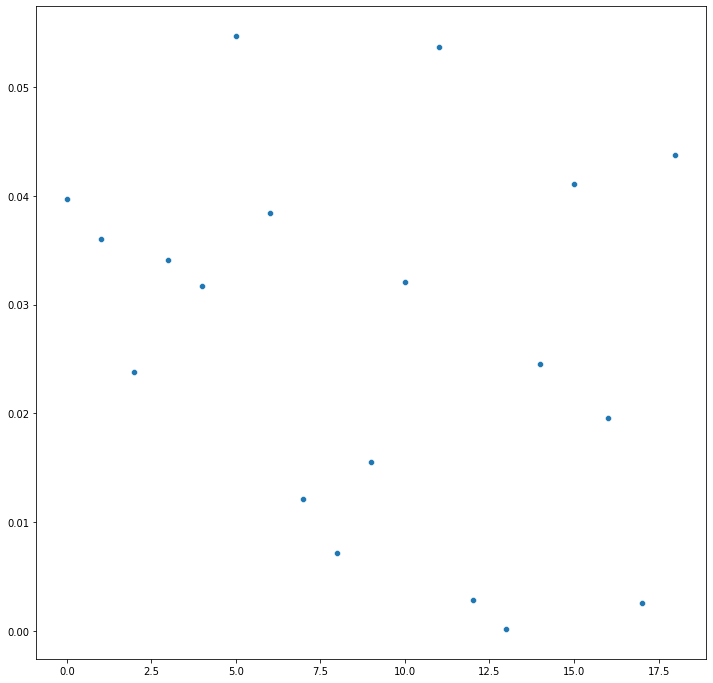

In [13]:
# 2. Use linear variance threshold to filter out features that do not explain the data set very well
variance_threshold = VarianceThreshold(threshold=0.04)
data_vt = variance_threshold.fit_transform(data)
plt.figure(figsize=(12, 12))
sns.scatterplot(range(0, variance_threshold.n_features_in_), variance_threshold.variances_)

In [14]:
data_vt

array([[9.09710392e-01, 5.34286270e-01, 7.56920420e-01, 8.55170000e-01],
       [9.06303237e-01, 7.17153082e-01, 1.61283840e-01, 8.81160000e-01],
       [3.25383305e-01, 6.66453727e-01, 5.22802561e-03, 9.38980000e-01],
       [7.85349233e-01, 7.46406716e-01, 3.29695474e-01, 7.39150000e-01],
       [7.13798978e-01, 7.04263343e-01, 1.12657044e-01, 9.22360000e-01],
       [6.60988075e-01, 6.02425945e-01, 3.74717842e-01, 9.14530000e-01],
       [8.72231687e-01, 6.63667837e-01, 7.05195712e-01, 8.79770000e-01],
       [8.07495741e-01, 7.06289048e-01, 3.42462595e-01, 8.29740000e-01],
       [2.43611584e-01, 4.82097724e-01, 6.64137197e-02, 9.25870000e-01],
       [8.22827939e-01, 5.86949994e-01, 3.85682277e-01, 8.66990000e-01],
       [5.60477002e-01, 4.64014762e-01, 4.85062554e-01, 5.87480000e-01],
       [5.80919932e-01, 5.72260177e-01, 1.78841353e-01, 8.62410000e-01],
       [6.95059625e-01, 4.92505335e-01, 1.16532939e-01, 6.36530000e-01],
       [6.09880750e-01, 6.93170152e-01, 3.35518953e

<AxesSubplot:>

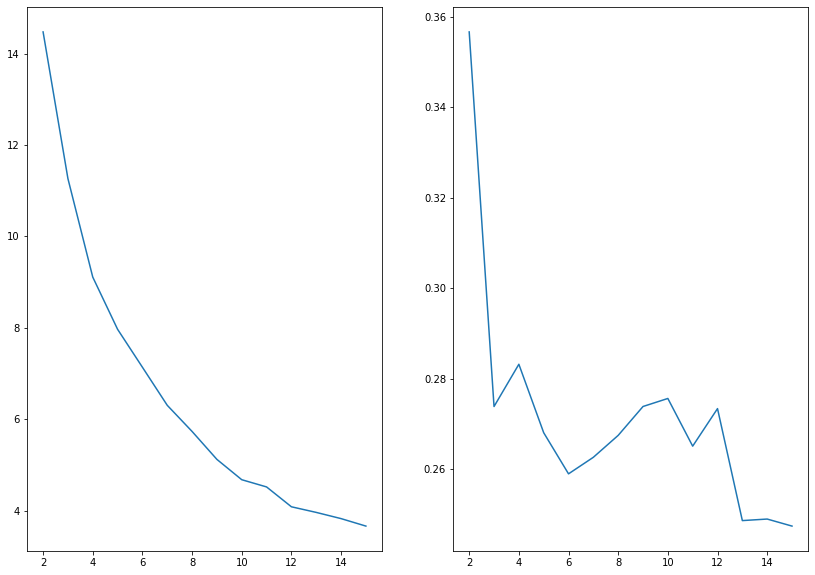

In [15]:
# Let's see again the kmeans scores
inertia_list = []
silhouette_coefficients = []
for clusters in range(2, max_clusters_number):
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=20, max_iter=200, random_state=42)
    kmeans.fit(data_vt)
    inertia_list.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(data_vt, kmeans.labels_))

# Plot inertia for different number of clusters
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(2, max_clusters_number), y=inertia_list, legend=True, ax=axes[0])
sns.lineplot(x=range(2, max_clusters_number), y=silhouette_coefficients, legend=True, ax=axes[1])

It looks like selecting features from the original set performs a little bit worse than PCA. I will see what meaningful statistics I can get about groups for both 4 and 6 clusters and select which one I think fits best.

In [16]:
# For 4 clusters
data_pca_4 = kept_data_pca.copy()
kmeans_4 = KMeans(init='random', n_clusters=4, n_init=20, max_iter=200, random_state=42)
labels = kmeans_4.fit_predict(data_pca_4)
data_pca_4['group'] = labels
data_pca_4.head()

,0,1,2,group
country,,,,
Finland,-0.839631,0.293327,0.303204,2
Denmark,-0.914218,0.425152,-0.178105,2
Iceland,-0.683420,0.234902,-0.227625,2
Switzerland,-0.861783,0.336690,-0.052872,2
Netherlands,-0.782291,0.351537,-0.197113,2


In [17]:
# Divide data into groups then get statistics about all groups
groups_indexes = []
for cluster in range(4):
    groups_indexes.append(data_pca_4.loc[data_pca_4['group'] == cluster].index)

In [18]:
# Get the actual groups with data I am interested in
groups = []
for group_indexes in groups_indexes:
    groups.append(data.loc[group_indexes, :])

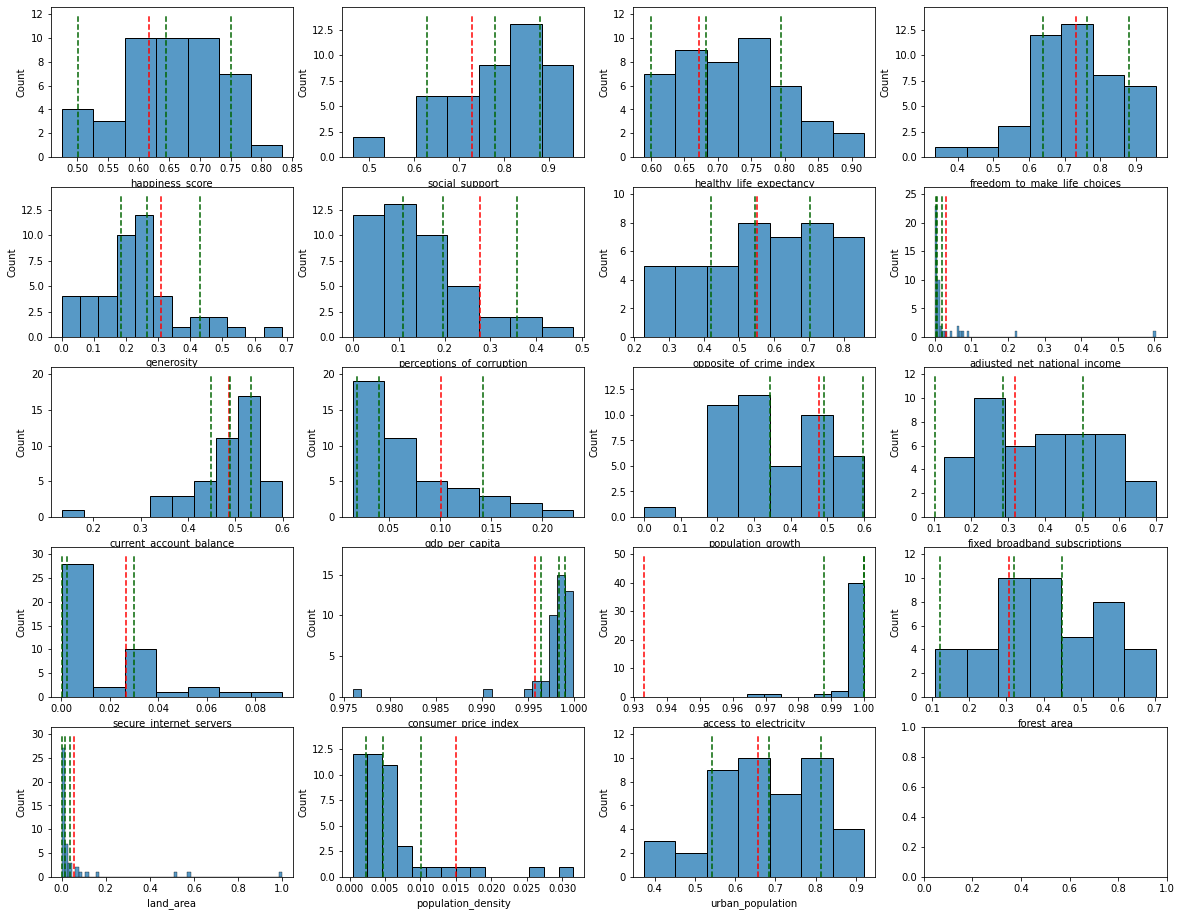

In [19]:
# For each group, plot statistics about each feature, along with mean and percentiles
# Plot for group 0
plot_features_for_group(groups_indexes[0], data, data_statistics)

For group 0 we can observe the following:
- they have a lower than average adjusted national income
- they have a higher than average gdp per capita
- they have a higher than average consumer price index
- they have a higher than average access to electricity
- lower than average land area

For all the other features, it looks like the data is well spread.
We can classify group 0 countries as: smaller, poorer countries, with cheaper living costs, having good access to electricity

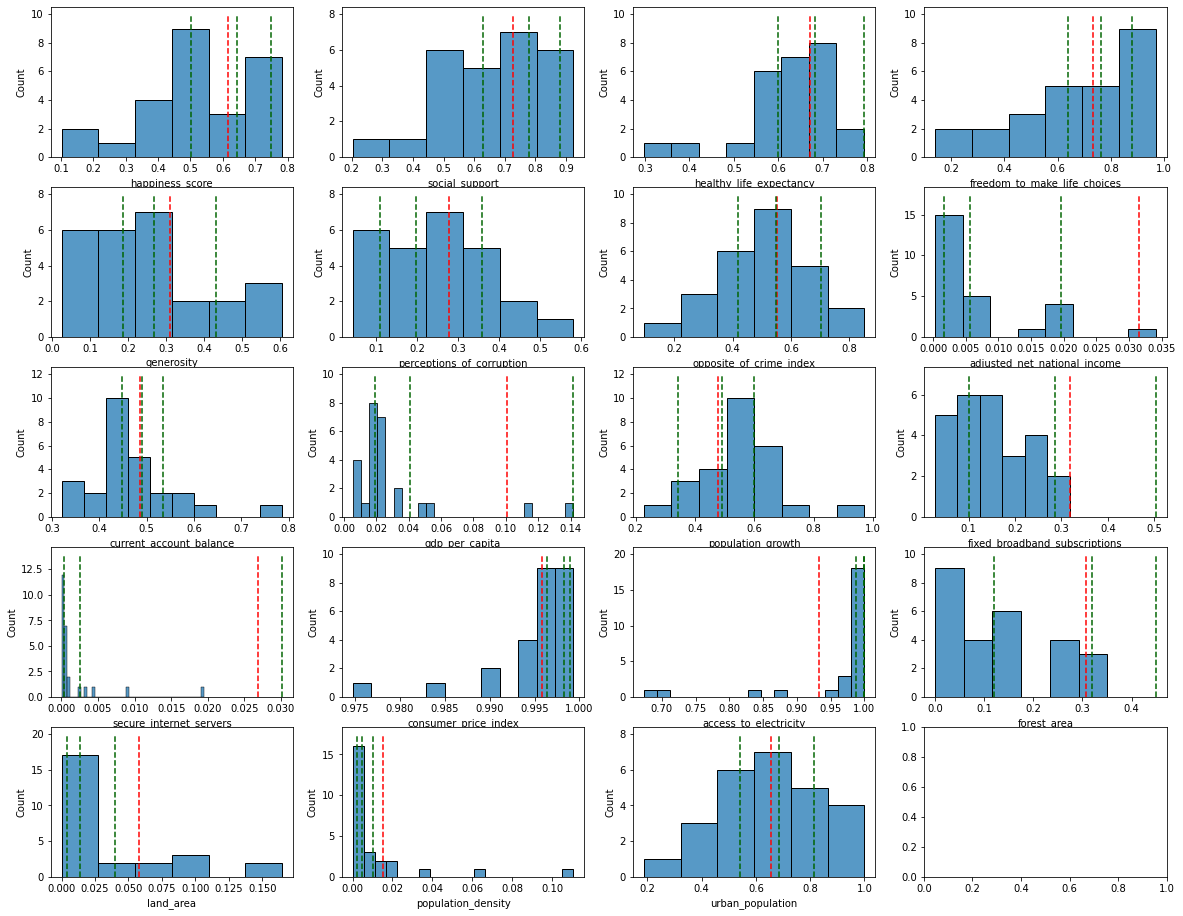

In [20]:
# Plot for group 1
plot_features_for_group(groups_indexes[1], data, data_statistics)

For group 1 we can observe the following:
- they have a lower than average adjusted national income
- they have a lower than average gdp per capita
- they have a lower than average fixed broadband subscriptions
- they have a lower than average secure internet servers
- they have a lower than average forest area
- medium population density

For all the other features, it looks like the data is well spread.
We can classify group 1 countries as: poorer (probably developing) countries, not very developed technologically necessarily, with not so many forested areas

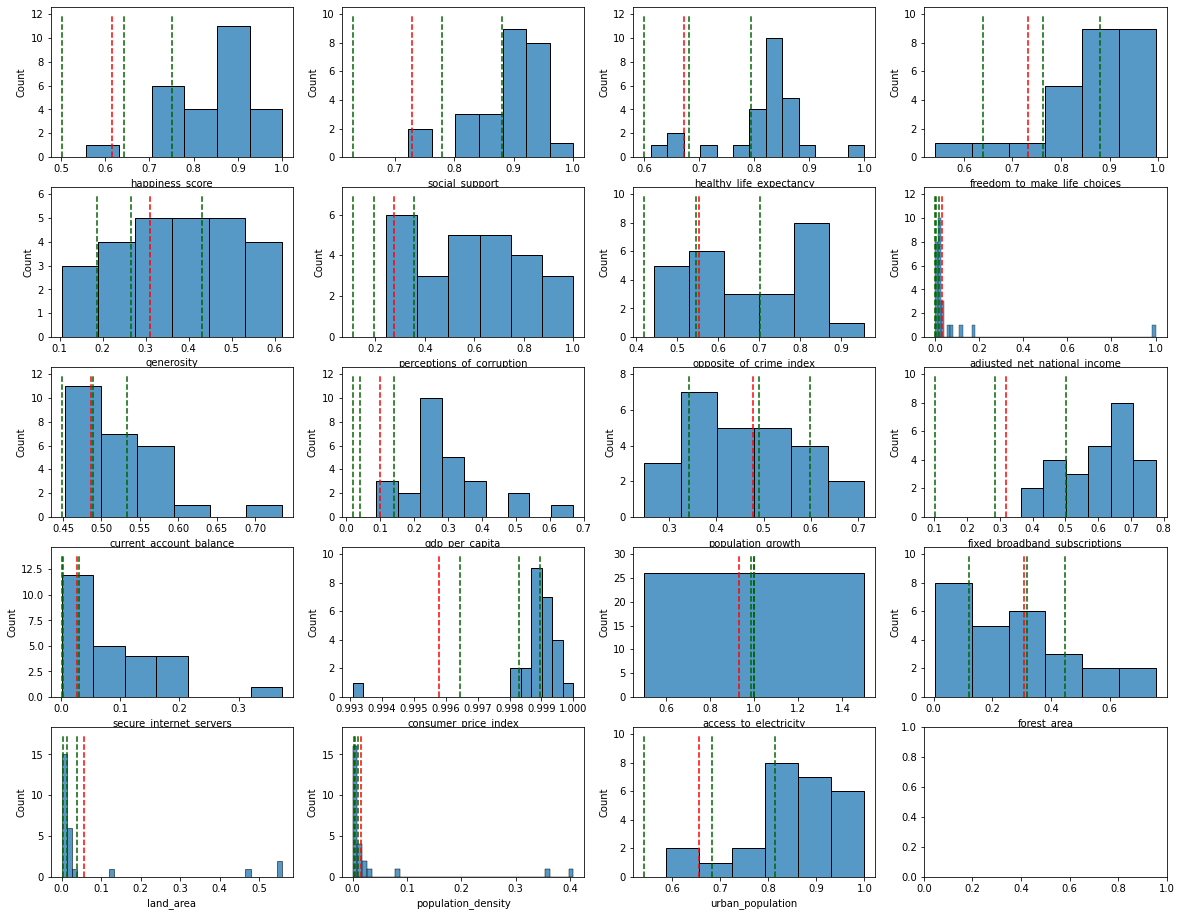

In [21]:
# Plot for group 2
plot_features_for_group(groups_indexes[2], data, data_statistics)

For group 2 we can observe the following:
- they have a higher than average happiness score, social support, freedom of life choices, healthy life expectancy, perceptions of corruption, opposite of crime index
- they have a higher than average fixed broadband subscriptions
- they have a higher than average consumer price index
- they have a higher than average population density

For all the other features, it looks like the data is well spread.
We can classify group 2 countries as: richer countries, safe with good health prospects, less corrupt, very developed technologically and crowded

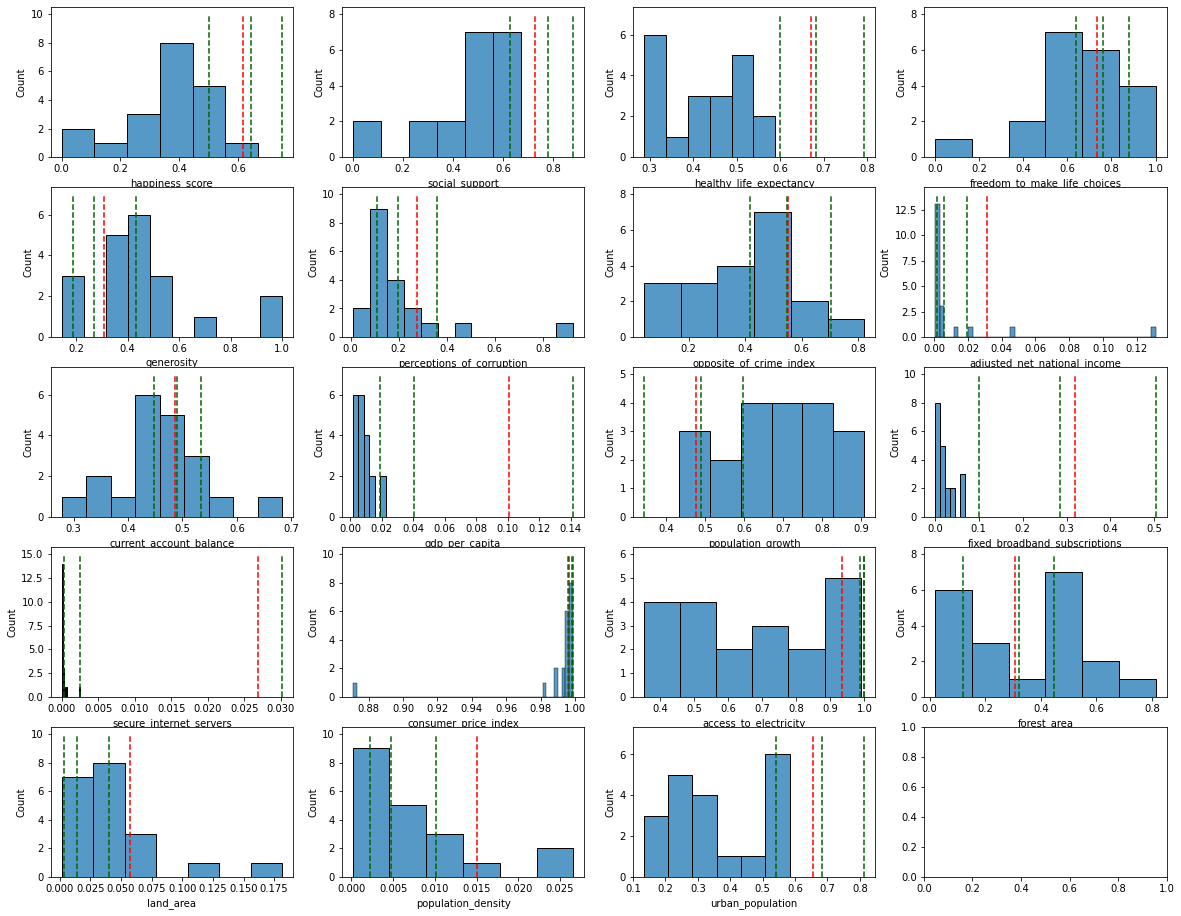

In [22]:
# Plot for group 3
plot_features_for_group(groups_indexes[3], data, data_statistics)

For group 3 we can observe the following:
- they have a lower than average happiness score, social support, healthy life expectancy
- they have a higher than average generosity
- they have a lower than average opposite of crime index
- they have a lower than average current account balance
- they have a lower than average gdp per capita
- they have a lower than average access to electricity
- they have a lower than average urban population

For all the other features, it looks like the data is well spread.
We can classify group 3 countries as: poor countries, that are less safe and in which the economy does not necessarily thrive, where many people still live in rural areas, but they are very generous

### 2.1 Adjusting to seen data

Because this would take a while to do for every clustering, I will also do the k-means 6 groups split and see the countries in each group and then try the other clustering methods.

In the end I will decide based on the scores of each clustering which one divided the 117 countries best.

In [23]:
# For 6 clusters
data_pca_6 = kept_data_pca.copy()
kmeans_6 = KMeans(init='random', n_clusters=6, n_init=20, max_iter=200, random_state=42)
labels = kmeans_6.fit_predict(data_pca_4)
data_pca_6['group'] = labels
data_pca_6.head()

C:\Users\Andrei\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,group
country,,,,
Finland,-0.839631,0.293327,0.303204,2
Denmark,-0.914218,0.425152,-0.178105,2
Iceland,-0.683420,0.234902,-0.227625,2
Switzerland,-0.861783,0.336690,-0.052872,2
Netherlands,-0.782291,0.351537,-0.197113,2


In [24]:
# Divide data into groups
groups_indexes = []
for cluster in range(6):
    groups_indexes.append(data_pca_6.loc[data_pca_6['group'] == cluster].index)

In [25]:
# Get the actual groups with data I am interested in
groups = []
for group_indexes in groups_indexes:
    groups.append(data.loc[group_indexes, :])

for group in groups:
    print(group.index)

Index(['Honduras', 'Nepal', 'Indonesia', 'Cameroon', 'Papua New Guinea',
       'Ghana', 'Cambodia', 'Uganda', 'Nigeria', 'Kenya', 'Pakistan',
       'Namibia', 'Myanmar', 'Ethiopia', 'India', 'Zambia', 'Tanzania',
       'Rwanda', 'Zimbabwe', 'Afghanistan'],
      dtype='object', name='country')
Index(['Libya', 'South Africa', 'Algeria', 'Morocco', 'Iraq', 'Iran', 'Turkey',
       'Tunisia', 'Egypt', 'Jordan', 'Botswana', 'Lebanon'],
      dtype='object', name='country')
Index(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand', 'Austria',
       'Australia', 'Ireland', 'Germany', 'Canada', 'United States',
       'United Kingdom', 'Belgium', 'France', 'United Arab Emirates',
       'Saudi Arabia', 'Singapore', 'Uruguay', 'Malta', 'Estonia',
       'Hong Kong'],
      dtype='object', name='country')
Index(['Czech Republic', 'Slovenia', 'Romania', 'Spain', 'Italy', 'Lithuania',
       'Slovakia', 'Cyprus', 'La

## 3. Affinity propagation

This is the second type of clustering I will try. I will evaluate its accuracy on the whole data, using pca and using variance threshold. As said above, at the end I will choose one clustering method that fits best to my problem.

In [26]:
affinity_propagation = AffinityPropagation(random_state=42)
affinity_propagation.fit(data)
silhouette_score(data, affinity_propagation.labels_)

0.175691627048617

<AxesSubplot:>

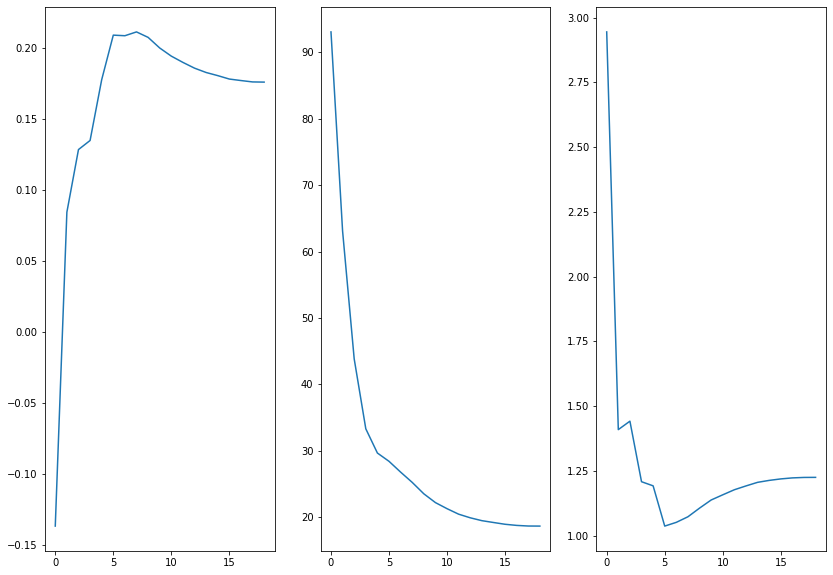

In [27]:
# 1. Use PCA to find better score for affinity propagation

# Check silhouette scores for different numbers of PCA components:
silhouette_scores = []
cal_har_scores = []
dav_bould_scores = []
for number_of_components in range(1, 20):
    affinity_propagation = AffinityPropagation(random_state=42)
    affinity_propagation.fit(data)
    silhouette_scores.append(silhouette_score(data_pca.iloc[:, range(number_of_components)], affinity_propagation.labels_))
    cal_har_scores.append(
        calinski_harabasz_score(data_pca.iloc[:, range(number_of_components)], affinity_propagation.labels_))
    dav_bould_scores.append(
        davies_bouldin_score(data_pca.iloc[:, range(number_of_components)], affinity_propagation.labels_))
# Plot silhouette score for different number of components
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(0, len(silhouette_scores)), y=silhouette_scores, legend=True, ax=axes[0])
sns.lineplot(x=range(0, len(cal_har_scores)), y=cal_har_scores, legend=True, ax=axes[1])
sns.lineplot(x=range(0, len(dav_bould_scores)), y=dav_bould_scores, legend=True, ax=axes[2])

It looks like the best scores were reached for 5 PCA components. It still is a very low silhouette score (0.2). There was a better score on kmeans (over 0.3).

In [28]:
# 2. Use linear variance threshold to filter out features that do not explain the data set very well

affinity_propagation = AffinityPropagation(random_state=42)
affinity_propagation.fit(data_vt)
silhouette_score(data_vt, affinity_propagation.labels_)

0.24511668713613538

This is again, not a very hopeful score.

## 4. Agglomerative clustering

This type of clustering uses a bottom up approach, meaning that every observation starts up in their own cluster and ends up being merged with other clusters as the clustering process develops. This algorithm might be more divisive and result in more coherent groups.

I will also use davies bouldin metric for scoring the clustering. This metric measures the similarity between clusters. This means that if the score is high, the clusters are very similar. I am looking for low scores on this metric.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

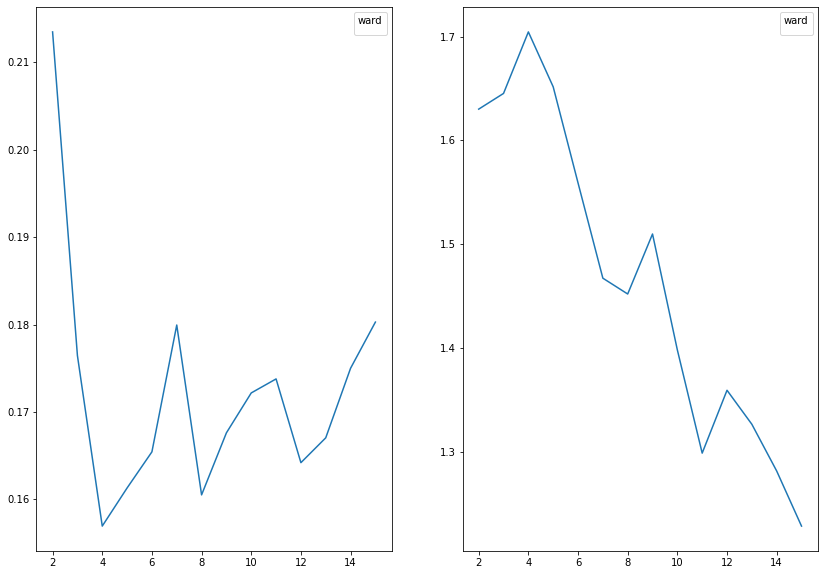

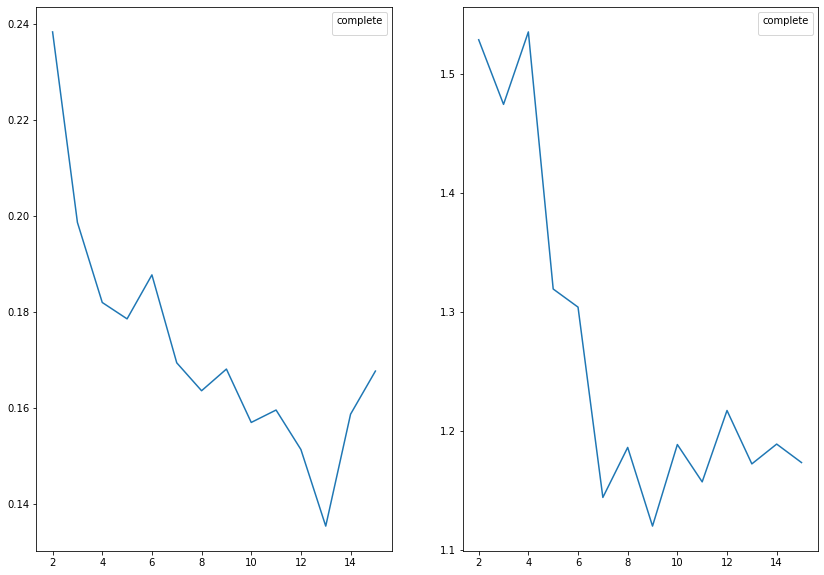

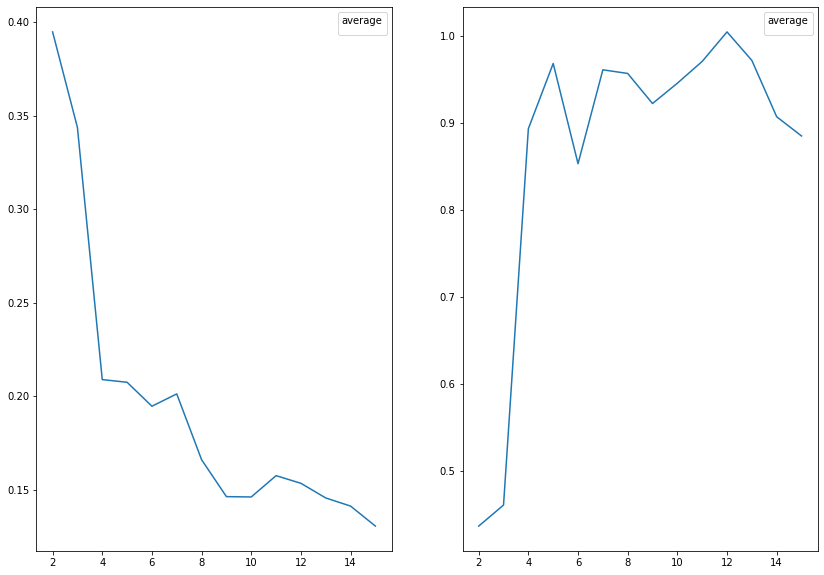

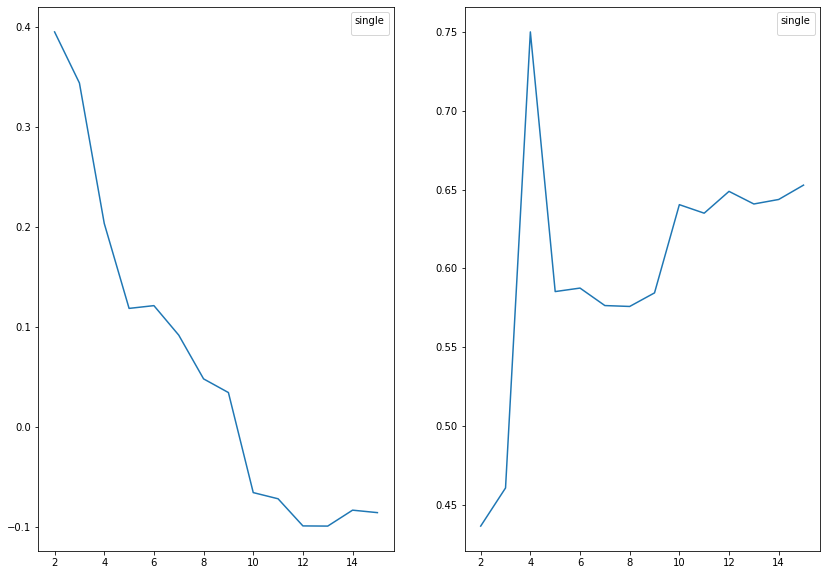

In [29]:
linkage_types = ['ward', 'complete', 'average', 'single']
for linkage_type in linkage_types:
    silhouette_scores = []
    dav_bould_scores = []
    for cluster_number in range(2, max_clusters_number):
        agg_clust = AgglomerativeClustering(compute_full_tree=True, n_clusters=cluster_number, linkage=linkage_type)
        agg_clust.fit(data)
        silhouette_scores.append(silhouette_score(data, agg_clust.labels_))
        dav_bould_scores.append(davies_bouldin_score(data, agg_clust.labels_))
    # Plot silhouette and davies bouldin scores for different number of clusters and for each linkage type
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(14, 10)
    sns.lineplot(x=range(2, max_clusters_number), y=silhouette_scores, legend=True, ax=axes[0])
    sns.lineplot(x=range(2, max_clusters_number), y=dav_bould_scores, legend=True, ax=axes[1])
    axes[0].legend(title=linkage_type)
    axes[1].legend(title=linkage_type)


It looks like there are high silhouette scores for link types 'average' and 'single'. These scores are for a number of 2 clusters, however. This does not help me, because I want to split the data into 4 or more groups.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

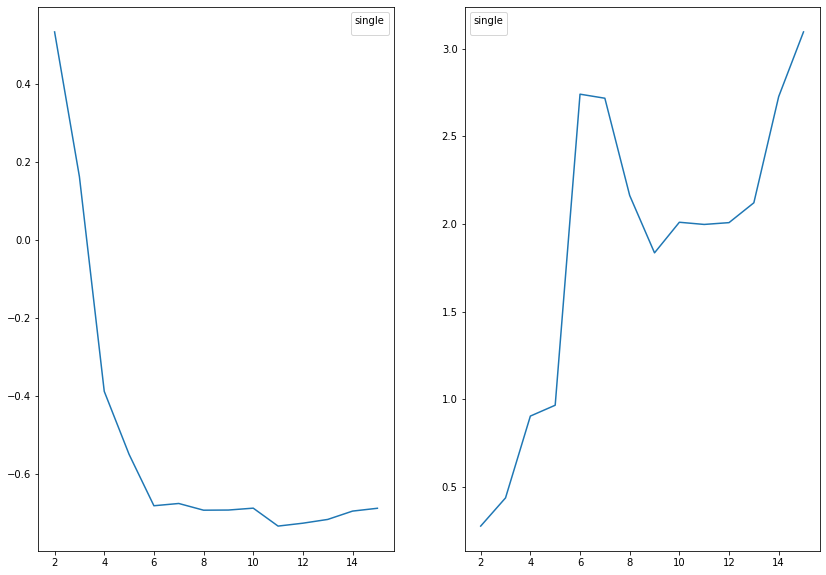

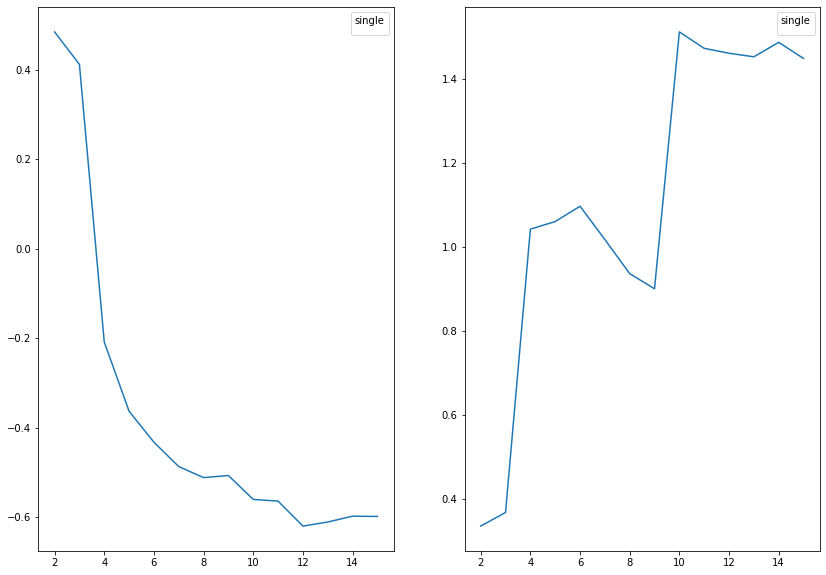

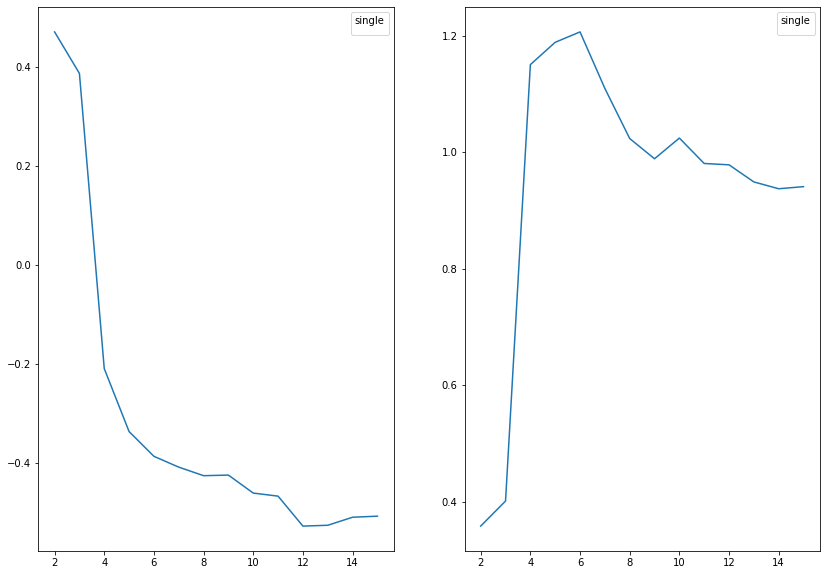

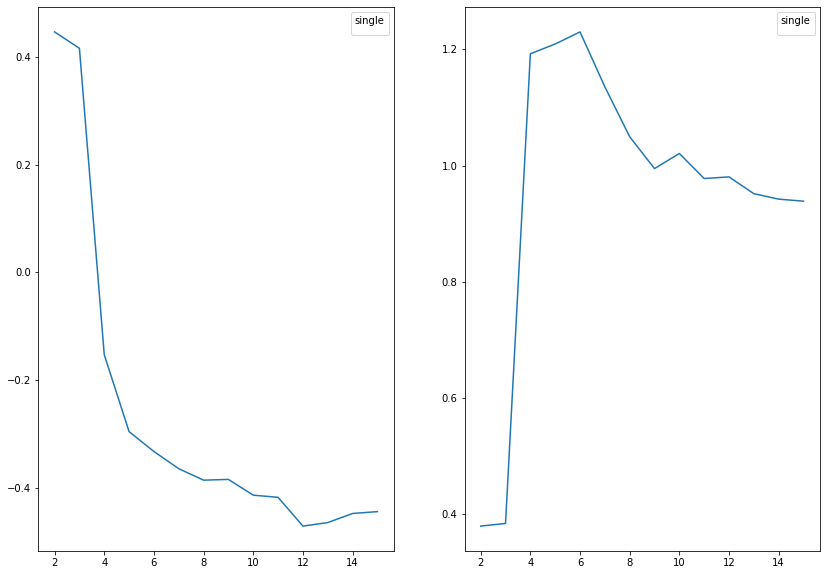

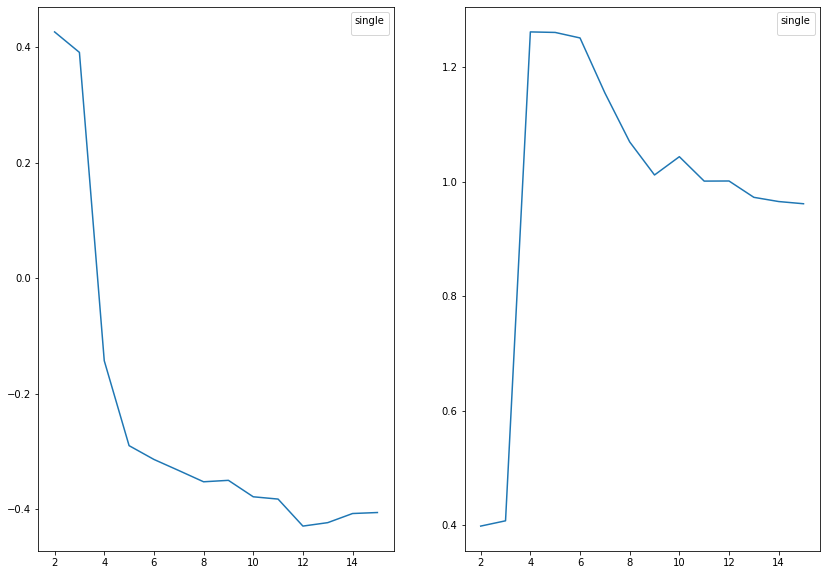

In [30]:
# 1. Use PCA to find better score for affinity propagation

# Check silhouette scores for different numbers of PCA components:
for components_number in range(1, 6):
    silhouette_scores = []
    dav_bould_scores = []
    for cluster_number in range(2, max_clusters_number):
        agg_clust = AgglomerativeClustering(compute_full_tree=True, n_clusters=cluster_number, linkage=linkage_type)
        agg_clust.fit(data)
        silhouette_scores.append(silhouette_score(data_pca.iloc[:, range(components_number)], agg_clust.labels_))
        dav_bould_scores.append(davies_bouldin_score(data_pca.iloc[:, range(components_number)], agg_clust.labels_))
    # Plot silhouette and davies bouldin scores for different number of clusters and for each linkage type
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(14, 10)
    sns.lineplot(x=range(2, max_clusters_number), y=silhouette_scores, legend=True, ax=axes[0])
    sns.lineplot(x=range(2, max_clusters_number), y=dav_bould_scores, legend=True, ax=axes[1])
    axes[0].legend(title=linkage_type)
    axes[1].legend(title=linkage_type)

Again, there are good scores for 2 clusters. For a higher than 4 number of clusters, the silhouette coefficient drops significantly, meaning that this type of clustering isn;t necessarily useful.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


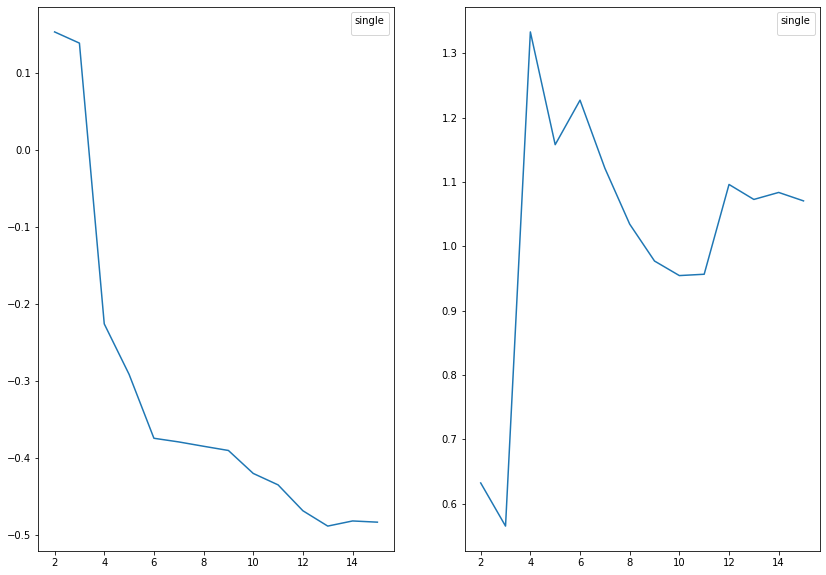

In [31]:
# 2. Use linear variance threshold to filter out features that do not explain the data set very well

silhouette_scores = []
dav_bould_scores = []
for cluster_number in range(2, max_clusters_number):
    agg_clust = AgglomerativeClustering(compute_full_tree=True, n_clusters=cluster_number, linkage=linkage_type)
    agg_clust.fit(data)
    silhouette_scores.append(silhouette_score(data_vt, agg_clust.labels_))
    dav_bould_scores.append(davies_bouldin_score(data_vt, agg_clust.labels_))
# Plot silhouette and davies bouldin scores for different number of clusters and for each linkage type
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(2, max_clusters_number), y=silhouette_scores, legend=True, ax=axes[0])
sns.lineplot(x=range(2, max_clusters_number), y=dav_bould_scores, legend=True, ax=axes[1])
axes[0].legend(title=linkage_type)
axes[1].legend(title=linkage_type)

## 5. DBSCAN

This type of clustering will search for high density clusters separated by low density areas. This means that the clusters found can have any shape.

In [32]:
# Try different parameters for DBSCAN
# epsilon is the maximum distance between 2 points so that they can be considered in the same cluster
# min_samples is the number of samples in a neighborhood for a point to be considered a core point
eps_list = [0.003 * x for x in range(1, 334)]
min_samples_list = range(2, 10)
for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        if (len(set(dbscan.labels_)) - 1 > 1) and (silhouette_score(data, dbscan.labels_) > 0.15):
            print("eps ={}, min_samples={}, silhouette_score={}, number_of_clusters={}".format(
                eps, min_samples, silhouette_score(data, dbscan.labels_), len(set(dbscan.labels_)) - 1))

eps =0.516, min_samples=2, silhouette_score=0.15744787918450853, number_of_clusters=2
eps =0.519, min_samples=2, silhouette_score=0.15744787918450853, number_of_clusters=2
eps =0.522, min_samples=2, silhouette_score=0.15744787918450853, number_of_clusters=2
eps =0.525, min_samples=2, silhouette_score=0.1580647949484982, number_of_clusters=2
eps =0.528, min_samples=2, silhouette_score=0.1580647949484982, number_of_clusters=2
eps =0.531, min_samples=2, silhouette_score=0.16588081148298914, number_of_clusters=2
eps =0.534, min_samples=2, silhouette_score=0.16588081148298914, number_of_clusters=2
eps =0.537, min_samples=2, silhouette_score=0.16588081148298914, number_of_clusters=2
eps =0.54, min_samples=2, silhouette_score=0.16588081148298914, number_of_clusters=2
eps =0.543, min_samples=2, silhouette_score=0.16588081148298914, number_of_clusters=2
eps =0.546, min_samples=2, silhouette_score=0.16588081148298914, number_of_clusters=2
eps =0.549, min_samples=2, silhouette_score=0.17491237949

The silhouette scores are relatively low. The number of clusters is too small.

In [33]:
# 1. Use PCA to find better score for DBSCAN

# I will create a dataframe with all the silhouette scores and other information for easier filtering
scores = pd.DataFrame({'components': [], 'eps': [], 'min_samples': [], 'silhouette_score': [], 'clusters': []})
# Check silhouette scores for different numbers of PCA components:
for components_number in range(1, 6):
    for eps in eps_list:
        for min_samples in min_samples_list:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data_pca.iloc[:, range(components_number)])
            cluster_number = len(set(dbscan.labels_)) - 1
            if (cluster_number > 2 and cluster_number < 12) and (
                silhouette_score(data_pca.iloc[:, range(components_number)], dbscan.labels_) > 0.3):
                current_score = {'components': components_number, 
                                 'eps': eps, 
                                 'min_samples': min_samples, 
                                 'silhouette_score': silhouette_score(
                                     data_pca.iloc[:, range(components_number)], dbscan.labels_),
                                'clusters': cluster_number}
                scores = scores.append(current_score, ignore_index = True)

C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores 

C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores 

C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(current_score, ignore_index = True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_17900\3014990578.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores 

In [34]:
# Check for options with more than 3 clusters
scores.loc[scores['clusters'] > 3].sort_values(by='silhouette_score', ascending=False).head(30)

,components,eps,min_samples,silhouette_score,clusters
50,1.0,0.063,3.0,0.438486,4.0
49,1.0,0.063,2.0,0.438486,4.0
47,1.0,0.060,7.0,0.434561,4.0
84,1.0,0.075,5.0,0.418450,4.0
83,1.0,0.075,4.0,0.418450,4.0
75,1.0,0.072,4.0,0.418450,4.0
67,1.0,0.069,4.0,0.418450,4.0
59,1.0,0.066,4.0,0.418450,4.0
3,1.0,0.036,2.0,0.417375,11.0
97,1.0,0.081,7.0,0.409357,4.0


The silhouette scores are comparable with scores from kmeans. I will check what groups I have for the best 4 clusters, but I will also check the 11 clusters group and the best 5 clusters group.

But before that, I will also try the variance threshold method and check if it can bring any value for dbscan.

In [35]:
# 2. Use linear variance threshold to filter out features that do not explain the data set very well
scores = pd.DataFrame({'components': [], 'eps': [], 'min_samples': [], 'silhouette_score': [], 'clusters': []})
for eps in eps_list:
        for min_samples in min_samples_list:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data_vt)
            cluster_number = len(set(dbscan.labels_)) - 1
            if (cluster_number > 2 and cluster_number < 12) and (
                silhouette_score(data_vt, dbscan.labels_) > 0.3):
                current_score = {'components': components_number, 
                                 'eps': eps, 
                                 'min_samples': min_samples, 
                                 'silhouette_score': silhouette_score(data_vt, dbscan.labels_),
                                'clusters': cluster_number}
                scores = scores.append(current_score, ignore_index = True)
# Check for options with more than 3 clusters
scores.loc[scores['clusters'] > 3].sort_values(by='silhouette_score', ascending=False).head(30)

,components,eps,min_samples,silhouette_score,clusters


It looks like none of the dbscan clusterings managed to get a good silhouette score or a convenient cluster number using the variance threshold feature filtering.

I will now check the best groups from DBSCAN. I will compare them with groups from K-means and decide on one clustering and describe the chosen groups.

In [46]:
# Check the dataframe above and get the highest silhouette scoring values for each number of clusters
labels_4_clusters = DBSCAN(eps=0.063, min_samples=3).fit(data_pca.iloc[:, range(1)]).labels_
labels_5_clusters = DBSCAN(eps=0.057, min_samples=7).fit(data_pca.iloc[:, range(1)]).labels_
labels_11_clusters = DBSCAN(eps=0.036, min_samples=2).fit(data_pca.iloc[:, range(1)]).labels_

In [50]:
dbscan_data = data.copy()
dbscan_data['4_clusters'] = labels_4_clusters
dbscan_data['5_clusters'] = labels_5_clusters
dbscan_data['11_clusters'] = labels_11_clusters
dbscan_data

,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,opposite_of_crime_index,adjusted_net_national_income,current_account_balance,gdp_per_capita,...,secure_internet_servers,consumer_price_index,access_to_electricity,forest_area,land_area,population_density,urban_population,4_clusters,5_clusters,11_clusters
country,,,,,,,,,,,,,,,,,,,,,
Finland,1.000000,0.953030,0.822718,0.994595,0.232906,0.909710,0.784169,0.012505,0.507407,0.279715,...,0.110178,0.999226,1.000000,0.756920,0.018558,0.000915,0.85517,0,-1,0
Denmark,0.965848,0.941667,0.824841,0.971622,0.401709,0.906303,0.803295,0.017378,0.609279,0.350675,...,0.373890,0.999337,1.000000,0.161284,0.002442,0.007380,0.88116,0,-1,-1
Iceland,0.951265,1.000000,0.852442,0.970270,0.576923,0.325383,0.837777,0.000978,0.508507,0.340302,...,0.101897,0.998072,1.000000,0.005228,0.006157,0.000177,0.93898,0,-1,-1
Switzerland,0.942957,0.928788,0.872611,0.914865,0.314103,0.785349,0.867514,0.031193,0.533379,0.500789,...,0.161959,1.000000,1.000000,0.329695,0.002413,0.011067,0.73915,0,-1,0
Netherlands,0.925051,0.913636,0.835456,0.879730,0.579060,0.713799,0.790172,0.041755,0.592995,0.300705,...,0.184681,0.998961,1.000000,0.112657,0.002056,0.026239,0.92236,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Botswana,0.196972,0.617424,0.297240,0.771622,0.025641,0.173765,0.429708,0.000648,0.345370,0.035549,...,0.000356,0.996839,0.698085,0.276321,0.034605,0.000203,0.70877,2,3,7
Rwanda,0.159498,0.100758,0.490446,0.839189,0.399573,0.926746,0.821862,0.000456,0.328688,0.003222,...,0.000110,0.996758,0.424313,0.114849,0.001506,0.026594,0.17432,3,4,8
Zimbabwe,0.109101,0.522727,0.286624,0.444595,0.226496,0.178876,0.341477,0.000773,0.580523,0.005624,...,0.000100,0.870794,0.490588,0.462919,0.023622,0.001940,0.32242,3,-1,9


In [52]:
# Group countries by cluster and then get indexes for each group to see the countries
grouped_4_clusters = dbscan_data.groupby('4_clusters')
cluster_4_groups = [grouped_4_clusters.get_group(x).index for x in grouped_4_clusters.groups]
cluster_4_groups

[Index(['Afghanistan'], dtype='object', name='country'),
 Index(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
        'Luxembourg', 'Sweden', 'Norway', 'Singapore'],
       dtype='object', name='country'),
 Index(['Israel', 'New Zealand', 'Austria', 'Australia', 'Ireland', 'Germany',
        'Canada', 'United States', 'United Kingdom', 'Czech Republic',
        'Belgium', 'France', 'Slovenia', 'United Arab Emirates', 'Spain',
        'Uruguay', 'Malta', 'Estonia', 'Japan', 'Portugal', 'South Korea',
        'Hong Kong'],
       dtype='object', name='country'),
 Index(['Bahrain', 'Costa Rica', 'Saudi Arabia', 'Romania', 'Italy',
        'Lithuania', 'Slovakia', 'Panama', 'Brazil', 'Guatemala', 'Kazakhstan',
        'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua', 'Mexico', 'Croatia',
        'Poland', 'El Salvador', 'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan',
        'Honduras', 'Argentina', 'Greece', 'Philippines', 'Thailand', 'Moldova',
        'Jamaica', 'Kyr

This looks like a very poor delimitation already. I will not use this for the app.

In [53]:
grouped_5_clusters = dbscan_data.groupby('5_clusters')
cluster_5_groups = [grouped_5_clusters.get_group(x).index for x in grouped_5_clusters.groups]
cluster_5_groups

[Index(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
        'Luxembourg', 'Sweden', 'Norway', 'Singapore', 'Papua New Guinea',
        'Uganda', 'Zimbabwe', 'Afghanistan'],
       dtype='object', name='country'),
 Index(['Israel', 'New Zealand', 'Austria', 'Australia', 'Ireland', 'Germany',
        'Canada', 'United States', 'United Kingdom', 'Czech Republic',
        'Belgium', 'France', 'Slovenia', 'United Arab Emirates', 'Spain',
        'Uruguay', 'Malta', 'Estonia', 'Japan', 'Portugal', 'South Korea',
        'Hong Kong'],
       dtype='object', name='country'),
 Index(['Bahrain', 'Costa Rica', 'Saudi Arabia', 'Romania', 'Italy',
        'Lithuania', 'Slovakia', 'Panama', 'Brazil', 'Kazakhstan', 'Cyprus',
        'Latvia', 'Serbia', 'Chile', 'Nicaragua', 'Mexico', 'Croatia', 'Poland',
        'El Salvador', 'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan',
        'Argentina', 'Greece', 'Philippines', 'Thailand', 'Moldova', 'Jamaica',
        'Belarus', 'Colombia'

Having Finland and Denmark in the same group as Afghanistan does not seem right, given the great difference between them. Let's see what 11 clusters can do.

In [54]:
grouped_11_clusters = dbscan_data.groupby('11_clusters')
cluster_11_groups = [grouped_11_clusters.get_group(x).index for x in grouped_11_clusters.groups]
cluster_11_groups

[Index(['Denmark', 'Iceland', 'Portugal', 'Uganda', 'Afghanistan'], dtype='object', name='country'),
 Index(['Finland', 'Switzerland'], dtype='object', name='country'),
 Index(['Netherlands', 'Luxembourg', 'Sweden', 'Norway', 'Singapore'], dtype='object', name='country'),
 Index(['Israel', 'Austria', 'Australia', 'Ireland', 'United States',
        'United Kingdom', 'Czech Republic', 'Belgium', 'France', 'Slovenia',
        'United Arab Emirates', 'Spain', 'Uruguay', 'Malta', 'Estonia', 'Japan',
        'South Korea'],
       dtype='object', name='country'),
 Index(['New Zealand', 'Germany', 'Canada', 'Hong Kong'], dtype='object', name='country'),
 Index(['Bahrain', 'Panama', 'Brazil', 'Guatemala', 'Kazakhstan', 'Serbia',
        'Chile', 'Nicaragua', 'Mexico', 'El Salvador', 'Kuwait', 'Mauritius',
        'Uzbekistan', 'Argentina', 'Philippines', 'Thailand', 'Moldova',
        'Jamaica', 'Kyrgyzstan', 'Colombia', 'Bosnia And Herzegovina',
        'Mongolia', 'Dominican Republic', 'Mal

Besides the first group, which I assume the algorithm assigned -1 for (we have 12 groups here, not 11), this split looks ok. The algorithm was said to create imbalanced groups and here we can see that. The -1 for first groups comes from not knowing where to put these entries, since they seem to not be suited to only 1 particular cluster.

## 6. Choosing a clustering method

From DBSCAN the one with 4 clusterings seems to be the best. I will also take a look at K-means's 6 group clustering.
I will decide from K-means 4 groups, DBSCAn 4 groups and K-means 6 groups. 

From there I will go on and find relevant descriptors of these groups that will help me create the country selector app.

I will keep in mind that the best silhouette score I got is for 4 clusters with DBSCAN using PCA.

In [55]:
# For 6 clusters
data_pca_6 = kept_data_pca.copy()
kmeans_6 = KMeans(init='random', n_clusters=6, n_init=20, max_iter=200, random_state=42)
labels = kmeans_6.fit_predict(data_pca_6)
data_pca_6['group'] = labels
data_pca_6.head()

,0,1,2,group
country,,,,
Finland,-0.839631,0.293327,0.303204,4
Denmark,-0.914218,0.425152,-0.178105,4
Iceland,-0.683420,0.234902,-0.227625,4
Switzerland,-0.861783,0.336690,-0.052872,4
Netherlands,-0.782291,0.351537,-0.197113,4


In [56]:
grouped_6_clusters = data_pca_6.groupby('group')
cluster_6_groups = [grouped_6_clusters.get_group(x).index for x in grouped_6_clusters.groups]
cluster_6_groups

[Index(['Mongolia', 'Libya', 'South Africa', 'Bangladesh', 'Algeria', 'Morocco',
        'Iraq', 'Iran', 'Turkey', 'Tunisia', 'Namibia', 'Egypt', 'Jordan',
        'Botswana', 'Lebanon', 'Afghanistan'],
       dtype='object', name='country'),
 Index(['Israel', 'Bahrain', 'United Arab Emirates', 'Saudi Arabia', 'Uruguay',
        'Malta', 'Kazakhstan', 'Kuwait', 'Uzbekistan', 'Armenia', 'Azerbaijan'],
       dtype='object', name='country'),
 Index(['Czech Republic', 'Belgium', 'France', 'Slovenia', 'Costa Rica',
        'Romania', 'Spain', 'Italy', 'Lithuania', 'Slovakia', 'Cyprus',
        'Latvia', 'Serbia', 'Chile', 'Croatia', 'Poland', 'Hungary', 'Japan',
        'Portugal', 'Argentina', 'Greece', 'South Korea', 'Belarus', 'China',
        'Montenegro', 'Russia', 'Bulgaria'],
       dtype='object', name='country'),
 Index(['Nepal', 'Cameroon', 'Papua New Guinea', 'Ghana', 'Cambodia', 'Uganda',
        'Nigeria', 'Kenya', 'Pakistan', 'Myanmar', 'Ethiopia', 'India',
        'Zambia', 

Because it looks like I could be more descriptive in terms of pluses and minuses for each group and the groups are more balanced, I will choose k-means with 6 groups.

I will do the same plotting as I did before for k-means with 4 groups and I will see what are advantages and disadvantages for each group.

In [57]:
# Get the actual groups with data I am interested in
groups_final = []
for group_indexes in cluster_6_groups:
    groups_final.append(data.loc[group_indexes, :])

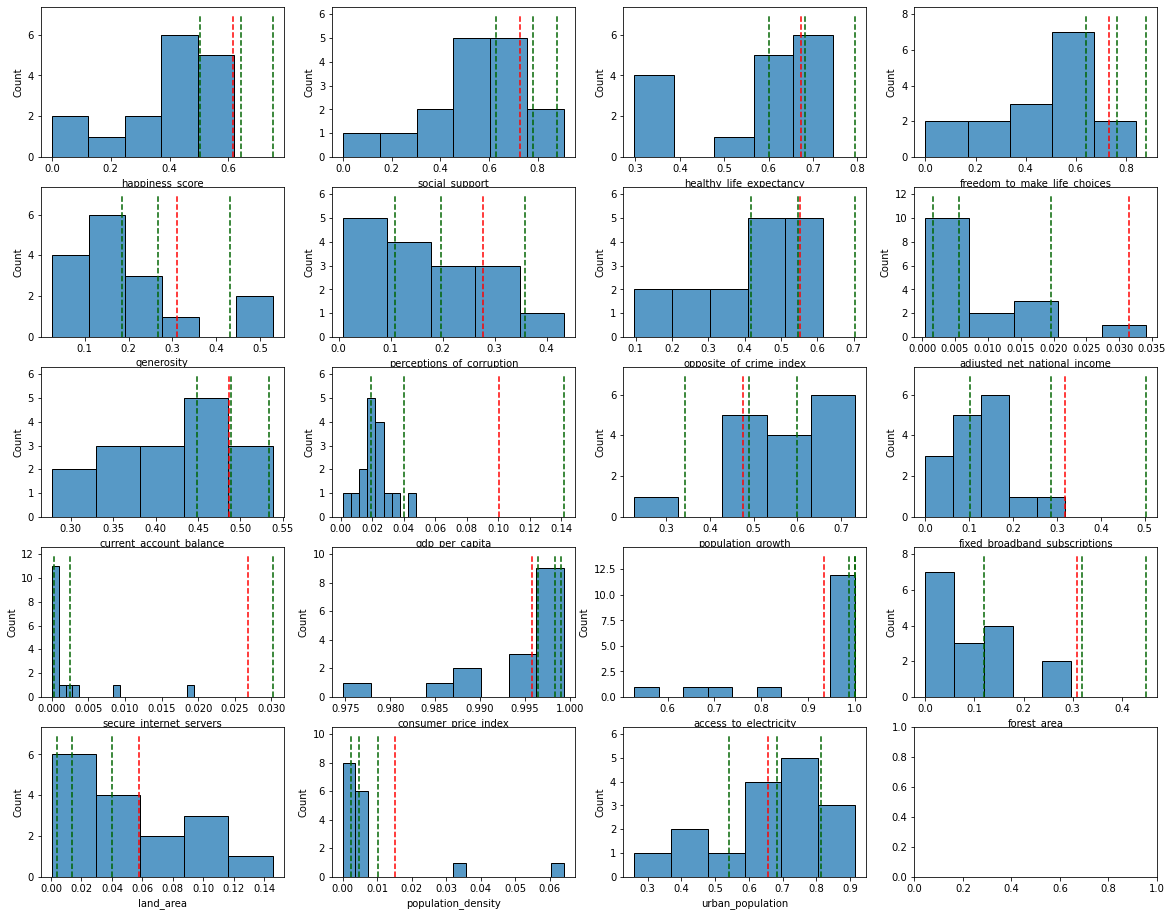

In [58]:
# For each group, plot statistics about each feature, along with mean and percentiles
# Plot for group 0
plot_features_for_group(cluster_6_groups[0], data, data_statistics)

For group 0 we can observe the following:
- they have a lower than average happiness score, social support, freed of life choices, generosity
- they have a lower than average gdp per capita
- they have a higher than average adjustend national income
- they have a lower than average opposite of crime index
- they have a lower than average account balance and fixed broadband subcriptions
- they have a higher than average land area
- they have a lower than average forest area

For all the other features, it looks like the data is well spread.
We can classify group 0 countries as: big countries, not very safe, developing countries, poorer than average and with lower than average natural areas

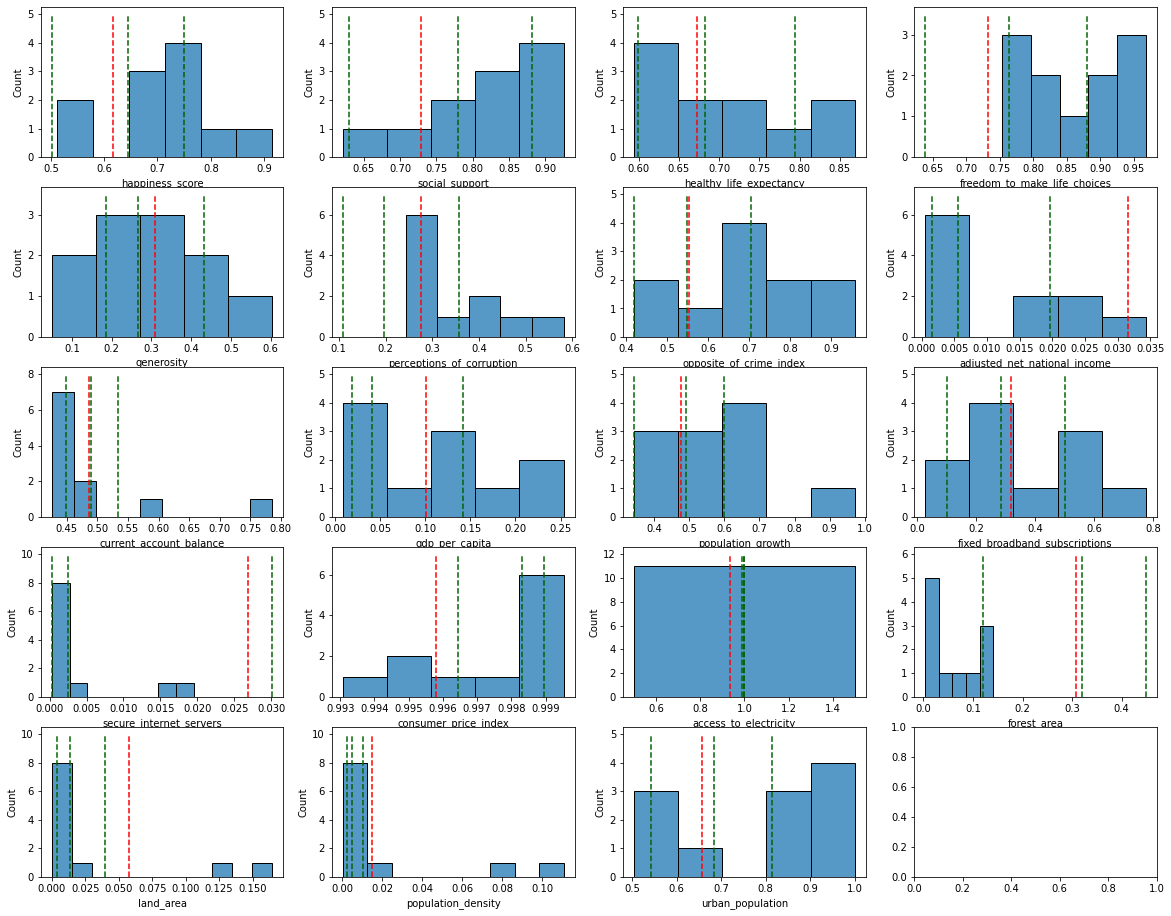

In [59]:
# Plot for group 1
plot_features_for_group(cluster_6_groups[1], data, data_statistics)

For group 1 we can observe the following:
- they have a higher than average happiness score, freedom to make life choices, (good) perceptions of corruption
- they have a higher than average gdp per capita
- they have a higher than average opposite of crime index
- they have a higher than average population growth
- they have a lower than average consumer price index
- they have a lower than average forest area
- they have a higher than average population density


For all the other features, it looks like the data is well spread.
We can classify group 1 countries as: countries that are very populated, in which people are living well, but living costs are big, they are safe, and do not have so many natural areas

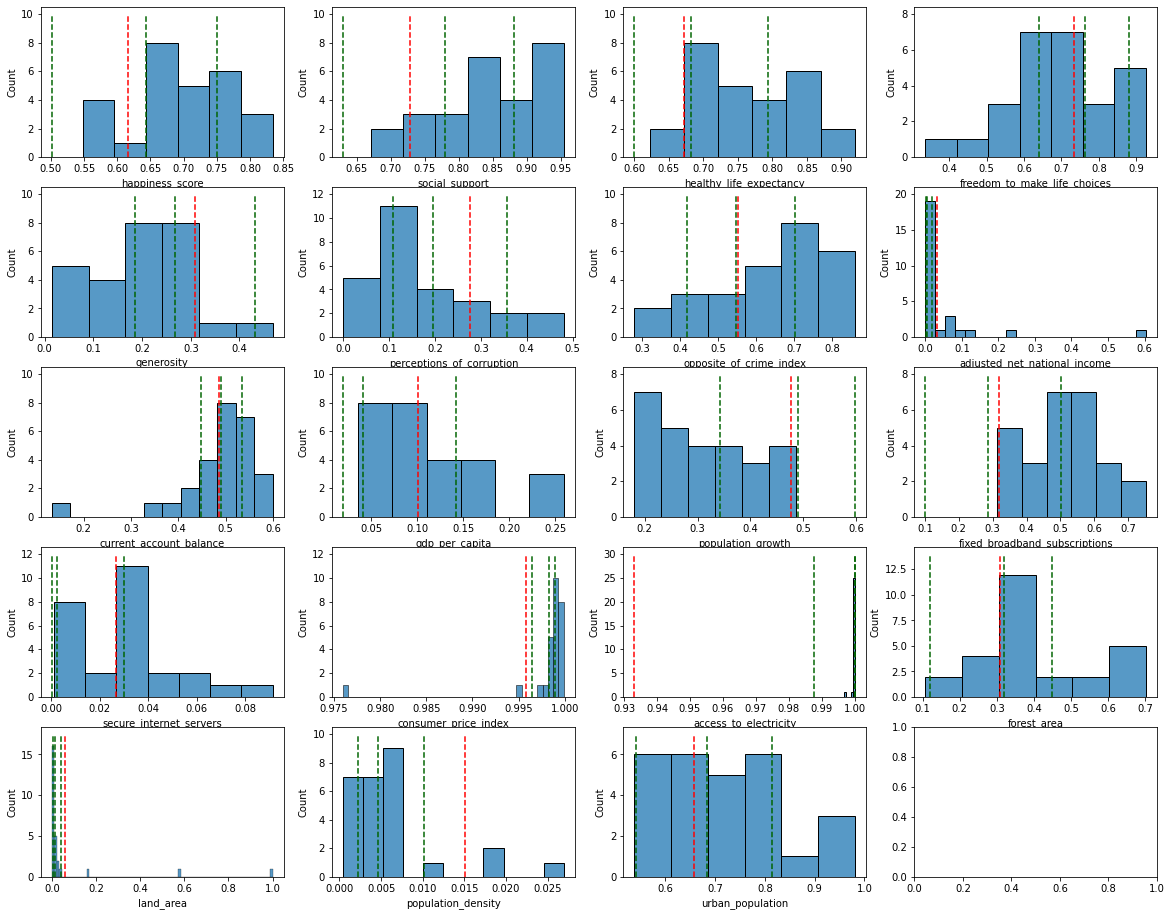

In [60]:
# Plot for group 2
plot_features_for_group(cluster_6_groups[2], data, data_statistics)

For group 2 we can observe the following:
- they have a higher than average happiness score, healthy life expectancy
- they have a lower than average freedom of choice and generosity
- they have a higher than average gdp per capita
- they have a lower than average population growth
- they have a higher than average fixed broadband subscriptions and secure internet servers
- they have a higher than average forest area


For all the other features, it looks like the data is well spread.
We can classify group 2 countries as: rich countries that have reached a peak, population is not growing as much, people are more restricted and not so generous, countries in which people are living well and also contain more forests

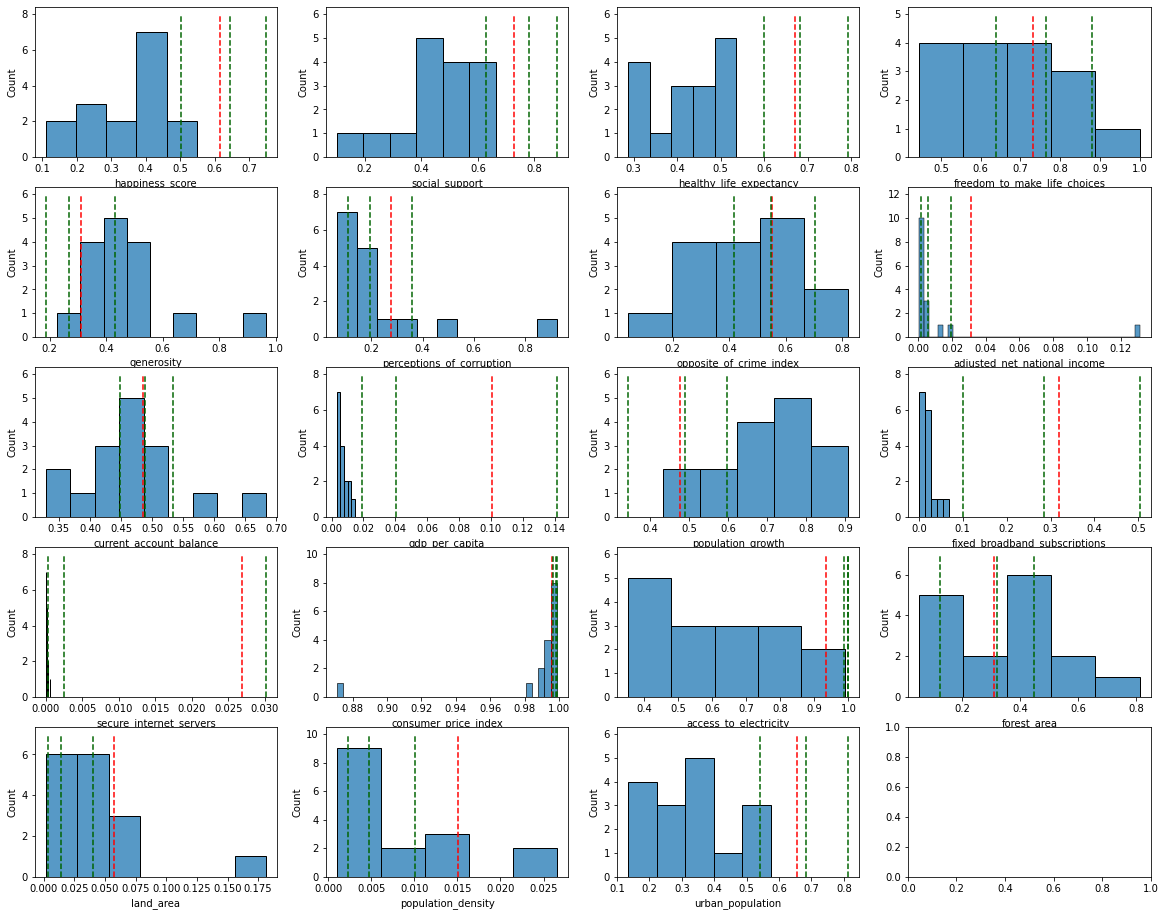

In [61]:
# Plot for group 3
plot_features_for_group(cluster_6_groups[3], data, data_statistics)

For group 3 we can observe the following:
- they have a lower than average happiness score, healthy life expectancy, social support, freedom to make life choices
- they have a higher than average generosity
- they have a lower than average gdp per capita
- they have a lower than average current acount balance
- they have a higher than average population growth
- they have a lower than average fixed broadband subscriptions, consumer price index and access to electricity
- they have a higher than average land area


For all the other features, it looks like the data is well spread.
We can classify group 3 countries as: big countries, that are poorer, perhaps with a more authoritative ruling, where people are poor but stick together more; the countries are developing, however at least population-wise

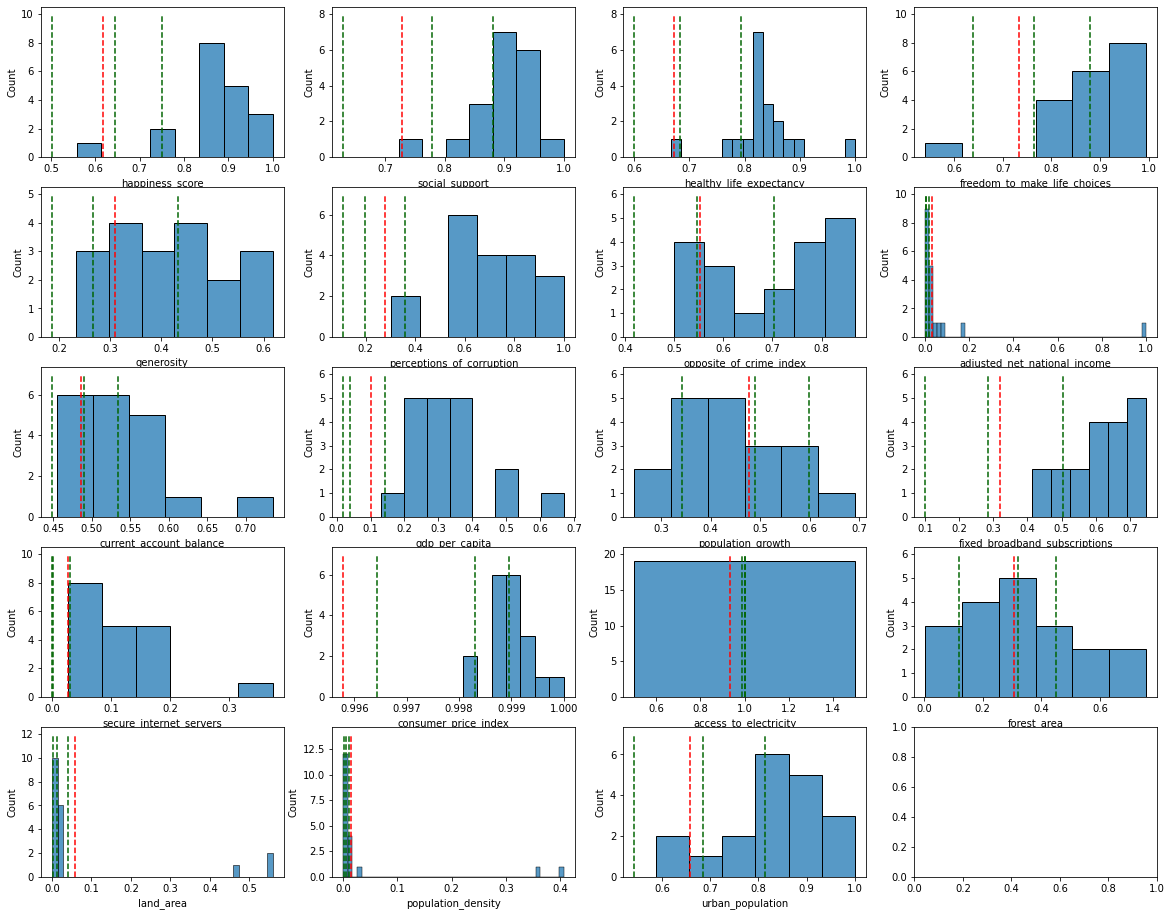

In [62]:
# Plot for group 4
plot_features_for_group(cluster_6_groups[4], data, data_statistics)

For group 4 we can observe the following:
- they have a higher than average happiness score, healthy life expectancy, social support, freedom to make life choices
- they have a higher than average generosity
- they have a higher than average (good) perception of corruption
- they have a higher than average opposite of crime index
- they have a higher than average current acount balance
- they have a higher than average gdp per capita
- they have a higher than average fixed broadband subscriptions, consumer price index, urban population


For all the other features, it looks like the data is well spread.
We can classify group 4 countries as: countries in which you can live very well, people are generous, politicians are seen as less corrupt, they are safe and rich and technologically developed; this looks like the group having the best stats

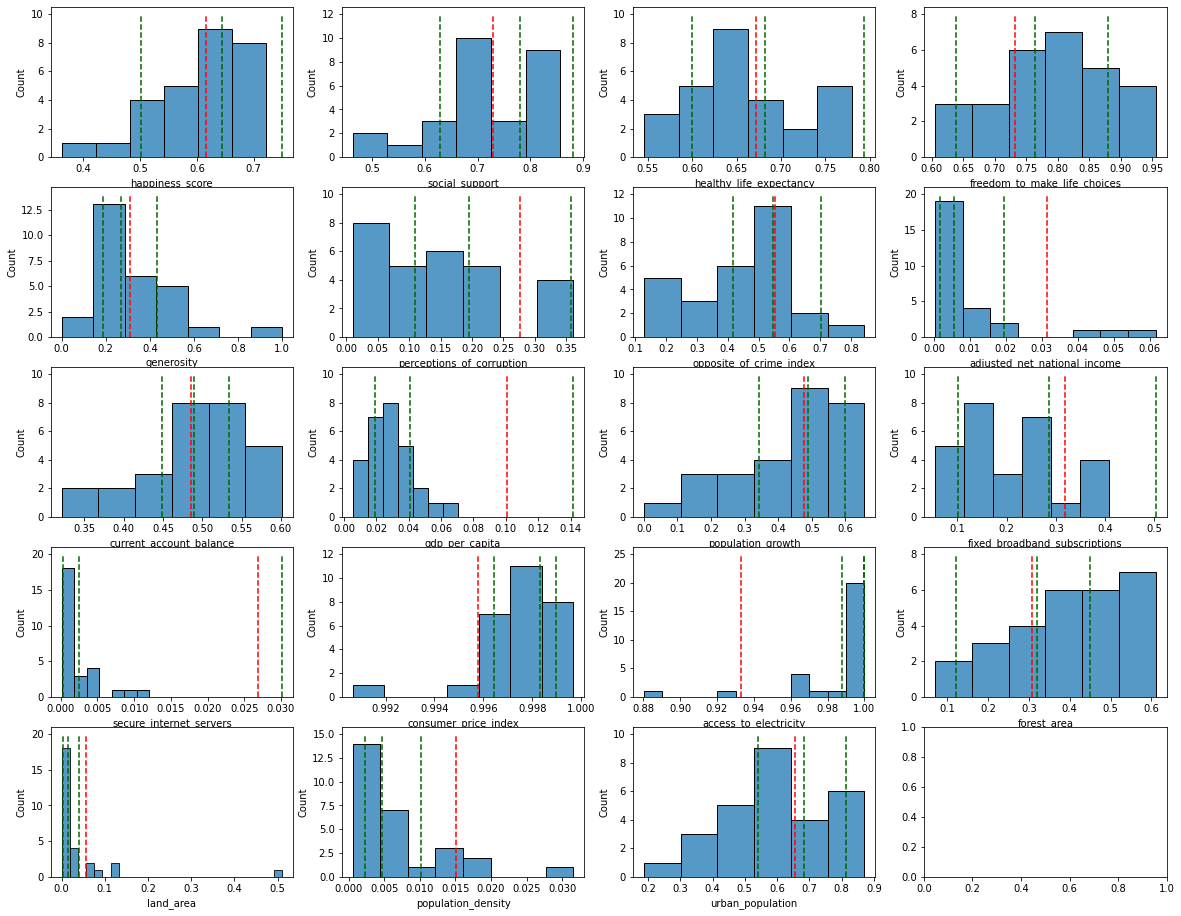

In [63]:
# Plot for group 5
plot_features_for_group(cluster_6_groups[5], data, data_statistics)

For group 5 we can observe the following:
- they have a lower than average social support, perception of corruption
- they have a lower than average opposite of crime index
- they have a lower than average gdp per capita
- they have a higher than average adjusted national income
- they have a lower than average fixed broadband subscription and urban population
- they have a higher than average forest area


For all the other features, it looks like the data is well spread.
We can classify group 5 countries as: more corrupt countries, which are not very safe and are poorer but developing; they are not very technologically developed, but have a lot of natural areas

Based on the descriptions of the above groups, I will have the next indices which for each group will have a value from 1 to 3 (1 = low, 2 = medium, 3 = high).

- Living costs
- Natural areas
- Country size
- People generosity
- Safety
- Technological development

I will store these groups to later use them in the project.
I will also give scoring on these 6 indices for each group and store these scoring as well.

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Mongolia,Libya,South Africa,Bangladesh,Algeria,Morocco,Iraq,Iran,Turkey,Tunisia,...,None,None,None,None,None,None,None,None,None,None
1,Israel,Bahrain,United Arab Emirates,Saudi Arabia,Uruguay,Malta,Kazakhstan,Kuwait,Uzbekistan,Armenia,...,None,None,None,None,None,None,None,None,None,None
2,Czech Republic,Belgium,France,Slovenia,Costa Rica,Romania,Spain,Italy,Lithuania,Slovakia,...,Portugal,Argentina,Greece,South Korea,Belarus,China,Montenegro,Russia,Bulgaria,None
3,Nepal,Cameroon,Papua New Guinea,Ghana,Cambodia,Uganda,Nigeria,Kenya,Pakistan,Myanmar,...,None,None,None,None,None,None,None,None,None,None
4,Finland,Denmark,Iceland,Switzerland,Netherlands,Luxembourg,Sweden,Norway,New Zealand,Austria,...,Hong Kong,None,None,None,None,None,None,None,None,None
5,Panama,Brazil,Guatemala,Nicaragua,Mexico,El Salvador,Mauritius,Honduras,Philippines,Thailand,...,Paraguay,Peru,Ecuador,Vietnam,Indonesia,North Macedonia,Albania,Ukraine,Georgia,Sri Lanka


In [70]:
# Create a dictionary of the groups
group_dict = {}
for index, group in enumerate(cluster_6_groups):
    group_dict[index] = list(group.values)
group_dict

# Store dictionary in json format
json.dump(group_dict, open('../data/groups.json', 'w'), indent=4)

In [71]:
# Create a dictionary of group scores
group_scores = {
    0: [2, 1, 3, 2, 1, 1], 1: [1, 1, 2, 2, 3, 2], 2: [3, 3, 2, 1, 2, 2], 
    3: [2, 2, 3, 3, 2, 2], 4:[2, 2, 2, 3, 3, 3], 5:[2, 3, 2, 2, 1, 1]}

# Store dictionary in json format
json.dump(group_scores, open('../data/group_scores.json', 'w'), indent=4)

This is it. Now I will build my app and based on these scores that I will prompt the user to choose, I will pick the best group for the user and output the group of countries matching it.